In [1]:
import random
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys
import ppscore as pps
sys.path.append("/Users/amit1.bhatti/Desktop/AI-LAB/experiment/Thesis_work/Canova-python/canova-1.0/src/canova")
from canova_source import canova
from scipy.stats import kendalltau, pearsonr, spearmanr
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Analysis Steps

* Across the subsets distribution of the feature weights.
* Across the subsets get the Negative weights and positive weight words
* For the above negative and positive weight words, top 10 and bottom 10 words with influence.


## OG Explanation Weights Mining

In [2]:
# Load the OG explanation JSON
with open("./explanation-output/explain-OG/OG.json", "rb") as file:
    og_json = json.load(file)

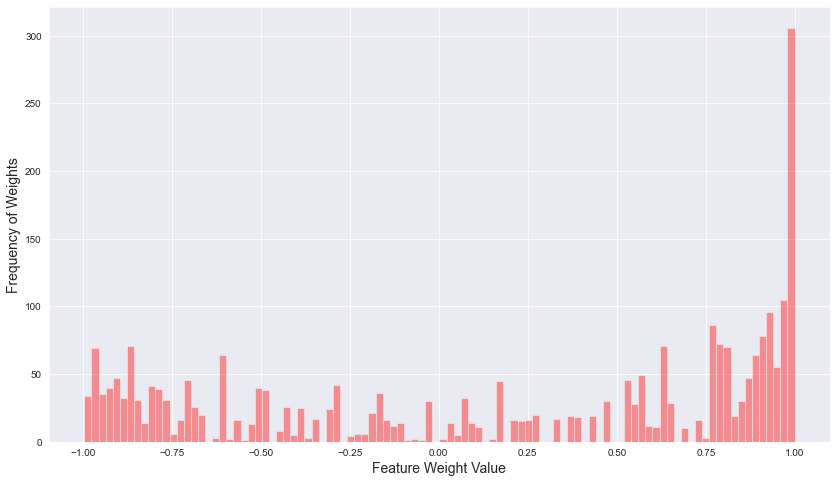

In [3]:
# The First level analysis simply check how the feature weights value look for OG
list_values = []
list_level_mean = []
for level_dict in og_json.values():
    for level in level_dict.keys():
        for phrase_dict in level_dict[level]:
            list_values.append(phrase_dict["value"])
            
# Sactter plot the feature weight values
sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.distplot(list_values, kde = False, color ='red', bins = 100)
plt.xlabel("Feature Weight Value", size=14)
plt.ylabel("Frequency of Weights", size=14)
plt.show()

**This show that most of the feature weights generated for the OG have high positive value.**

In [4]:
# High positive weights words and high Negative weight words

word_weight_dict = {}
word_count = {}
for datapoint in og_json.keys():
    
    # Last node belonging to the datapoint
    last_level = list(og_json[datapoint].keys())[-1]
    
    for word_dict in og_json[datapoint][last_level]:
        if word_dict["word"] not in word_weight_dict.keys():
            word_weight_dict.update({word_dict["word"]: word_dict["value"]})
            word_count[word_dict["word"]] = 1
        else:
            word_count[word_dict["word"]] += 1
            key = word_dict["word"]+ "-" + str(word_count[word_dict["word"]])
            word_weight_dict.update({key: word_dict["value"]})
    

word_weight_dict  = {k: v for k, v in sorted(word_weight_dict.items(), key=lambda item: item[1], reverse=True)}

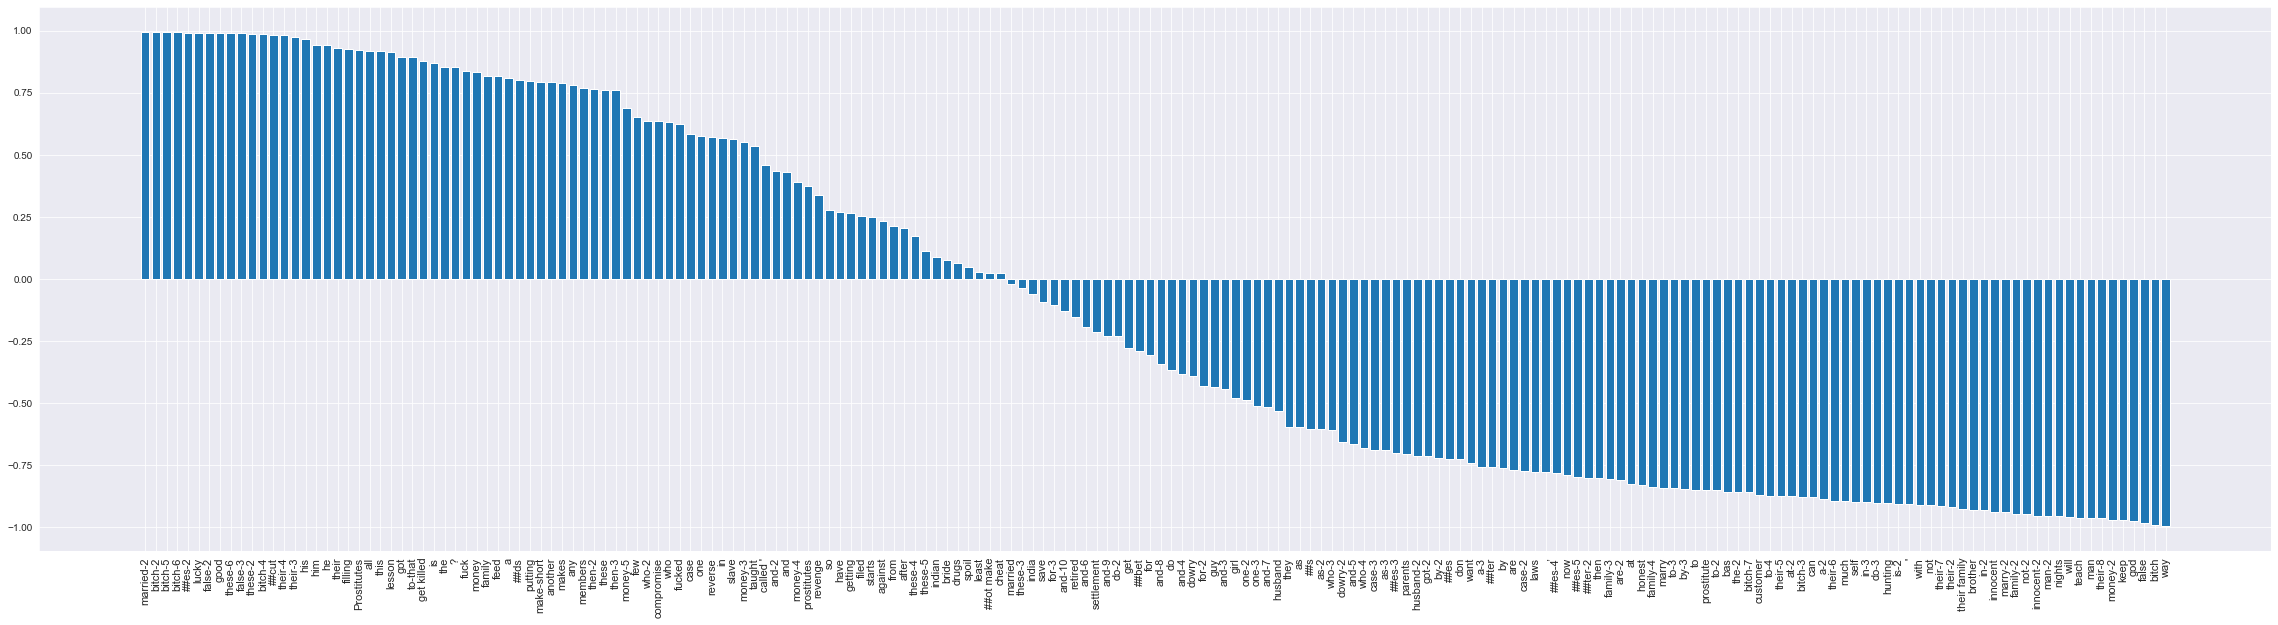

In [5]:
plt.figure(figsize=(40, 10))
plt.bar(range(len(word_weight_dict)), list(word_weight_dict.values()), align='center')
plt.xticks(range(len(word_weight_dict)), list(word_weight_dict.keys()), size=11, rotation=90)
plt.show()

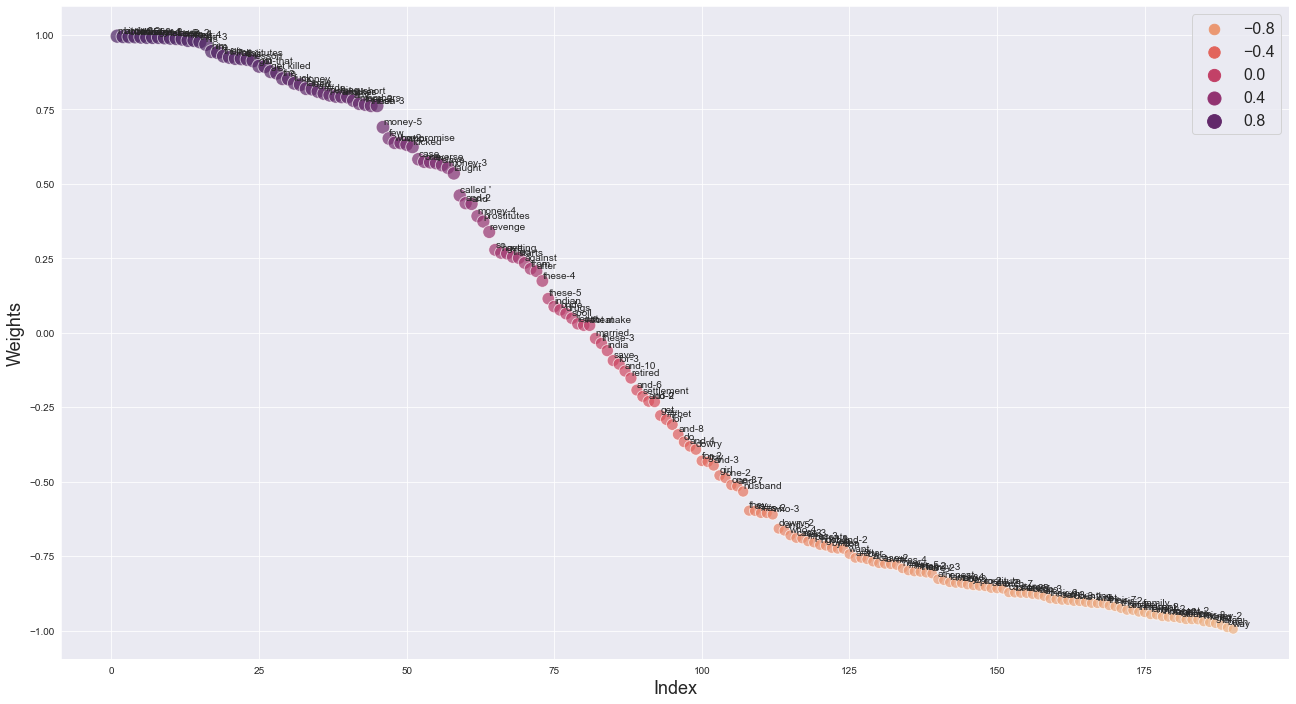

In [6]:
plt.figure(figsize=(22, 12))
sns.set_palette(sns.color_palette("husl", 8))
df_word_dict = pd.DataFrame(
    {
        "Words": list(word_weight_dict.keys()), 
        "Weights": list(word_weight_dict.values())
    }, 
    
    index=[x+1 for x in range(len(list(word_weight_dict.keys())))]
                           )

sns.scatterplot(x=df_word_dict.index, y='Weights', hue='Weights', data=df_word_dict, palette="flare", s=60, size='Weights', sizes=(100, 200), alpha=0.7)

x= df_word_dict.index.values
y=df_word_dict["Weights"].values
text = df_word_dict["Words"].values

for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i]+0.01))

plt.xlabel("Index", size=18)
plt.ylabel("Weights", size=18)
plt.legend(prop={'size': 16})
plt.show()


There are 7 instances of the word bitch to be found, where 4 instances have average feature score of 0.987 while 3 feature weights have average score of -0.896. When the connotation of these instances is observed, all of their utterances have been made in a derogatory sense and should have high positive feature weight. There are words such as then, these, who, in, so, which have high positive weight values, although these words are impurely non-informative and case markers. The words fuck, compromise, prostitutes have been given high feature weights but there is an instance where the word prostitutes have been given low feature weight too. This again points in the direction of inconsistencies present in the feature weights generated.
Overall no consistent comment can be made, whether the explanation method is helping in understanding the right reasons behind the explanation generated.


## NG Explanation Weights Mining

In [7]:
# Load the OG explanation JSON
with open("./explanation-output/explain-NG/NG.json", "rb") as file:
    og_json = json.load(file)

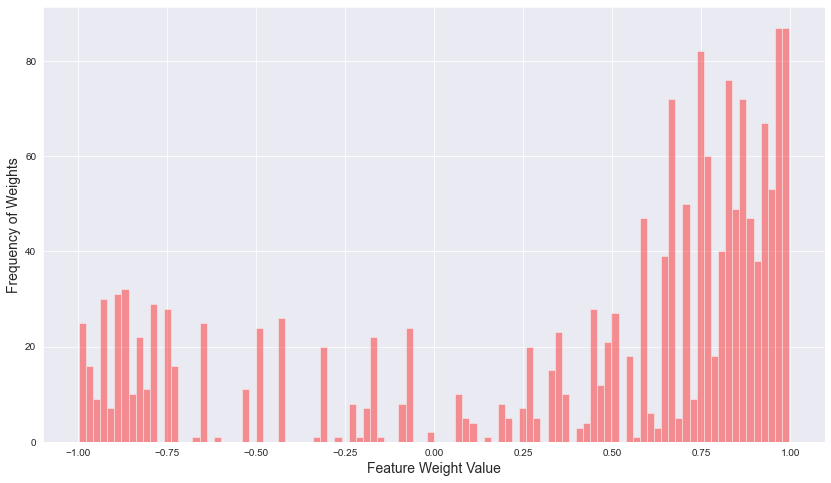

In [8]:
# The First level analysis simply check how the feature weights value look for OG
list_values = []
list_level_mean = []
for level_dict in og_json.values():
    for level in level_dict.keys():
        for phrase_dict in level_dict[level]:
            list_values.append(phrase_dict["value"])
            
# Sactter plot the feature weight values
sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.distplot(list_values, kde = False, color ='red', bins = 100)
plt.xlabel("Feature Weight Value", size=14)
plt.ylabel("Frequency of Weights", size=14)
plt.show()

In [9]:
# High positive weights words and high Negative weight words

word_weight_dict = {}
word_count = {}
for datapoint in og_json.keys():
    
    # Last node belonging to the datapoint
    last_level = list(og_json[datapoint].keys())[-1]
    
    for word_dict in og_json[datapoint][last_level]:
        if word_dict["word"] not in word_weight_dict.keys():
            word_weight_dict.update({word_dict["word"]: word_dict["value"]})
            word_count[word_dict["word"]] = 1
        else:
            word_count[word_dict["word"]] += 1
            key = word_dict["word"]+ "-" + str(word_count[word_dict["word"]])
            word_weight_dict.update({key: word_dict["value"]})
    

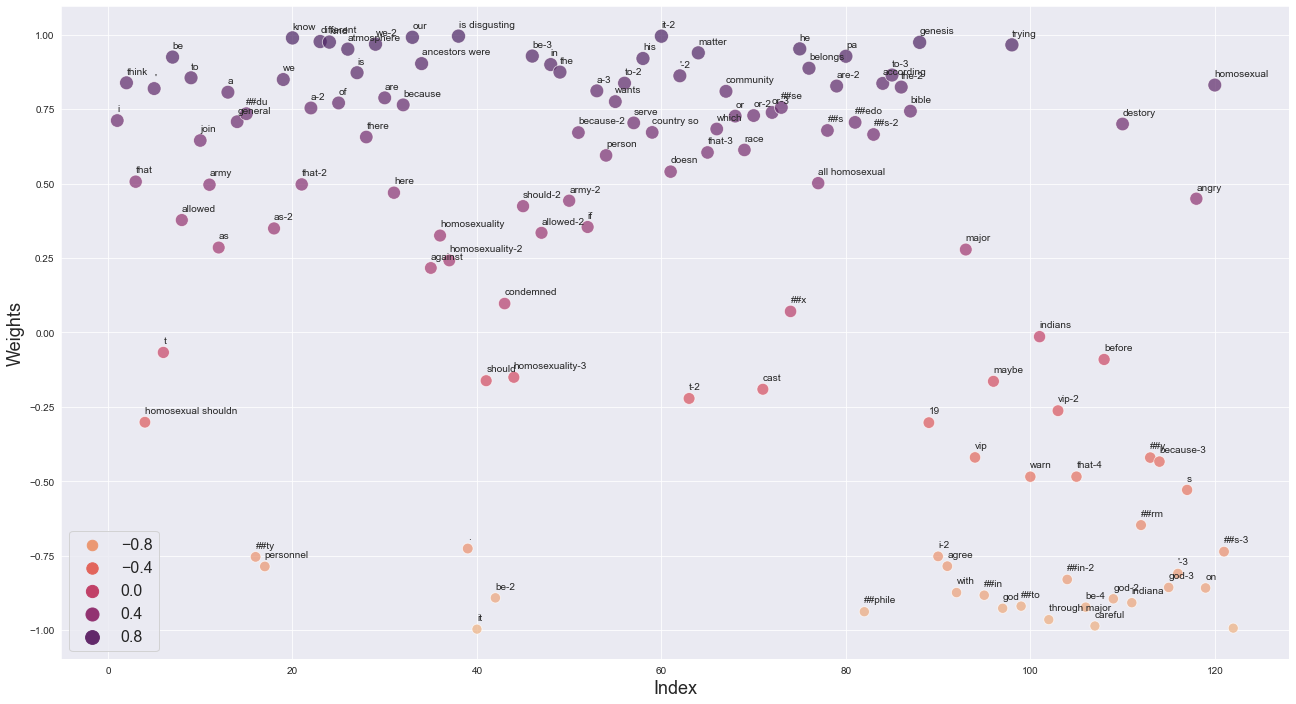

In [10]:
plt.figure(figsize=(22, 12))
sns.set_palette(sns.color_palette("husl", 8))
df_word_dict = pd.DataFrame(
    {
        "Words": list(word_weight_dict.keys()), 
        "Weights": list(word_weight_dict.values())
    }, 
    
    index=[x+1 for x in range(len(list(word_weight_dict.keys())))]
                           )

sns.scatterplot(x=df_word_dict.index, y='Weights', hue='Weights', data=df_word_dict, palette="flare", s=70, size='Weights', sizes=(100, 200), alpha=0.7)

x= df_word_dict.index.values
y=df_word_dict["Weights"].values
text = df_word_dict["Words"].values

for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i]+0.03), size=10)

plt.xlabel("Index", size=18)
plt.ylabel("Weights", size=18)
plt.legend(prop={'size': 16})
plt.show()


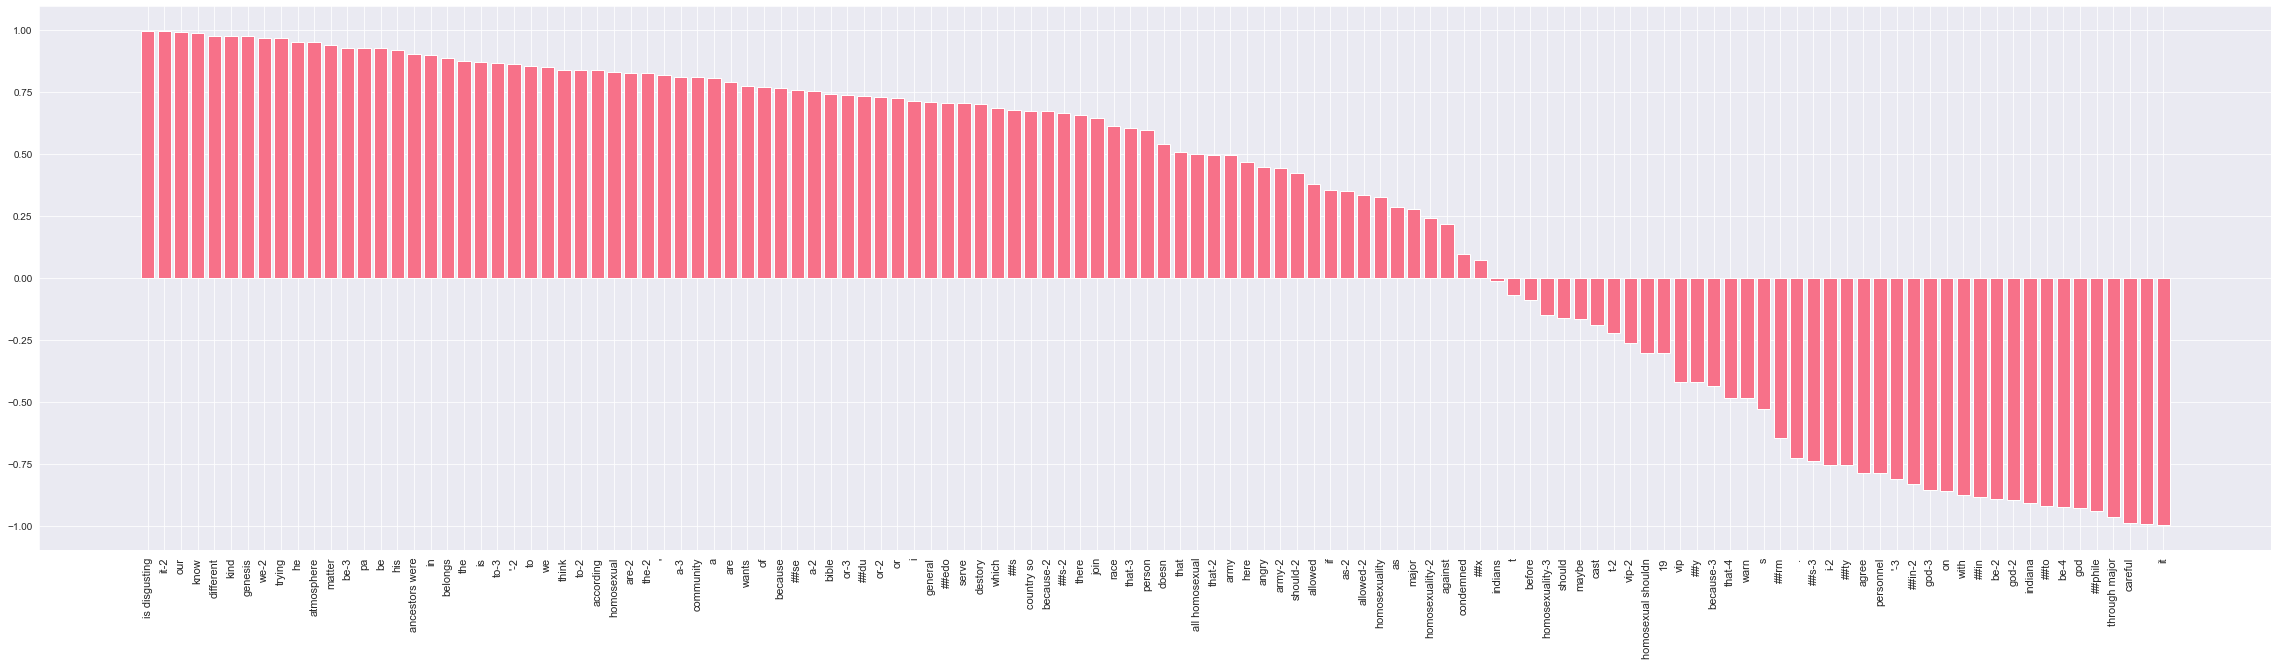

In [11]:
word_weight_dict  = {k: v for k, v in sorted(word_weight_dict.items(), key=lambda item: item[1], reverse=True)}
plt.figure(figsize=(40, 10))
plt.bar(range(len(word_weight_dict)), list(word_weight_dict.values()), align='center')
plt.xticks(range(len(word_weight_dict)), list(word_weight_dict.keys()), size=11, rotation=90)
plt.show()

The token ##du is the result of the process that, the way BERT model handles unknown tokens. For example, decide and decided, if decide is present in the vocab but decided not, the word decided in broken down into decide + ##d. Considering ##du as a noise in terms of. Information holding token, the high feature weight for the same points in the direction of gaps of the explanation method. Further, the homosexual is observed to have occurred with negative feature weight also. This observation is consistent with the word bitch which we saw in the previous section. Although, again the connotation of the term homosexual in all the instance found is same and should have been flagged as high positive feature weight token, but the case is otherwise. Overall, the gaps found in the OG subset explanations are consistent with the gaps found in this section.

## ONG Explanation Weights Mining

In [12]:
# Load the OG explanation JSON
with open("./explanation-output/explain-ONG/ONG.json", "rb") as file:
    og_json = json.load(file)

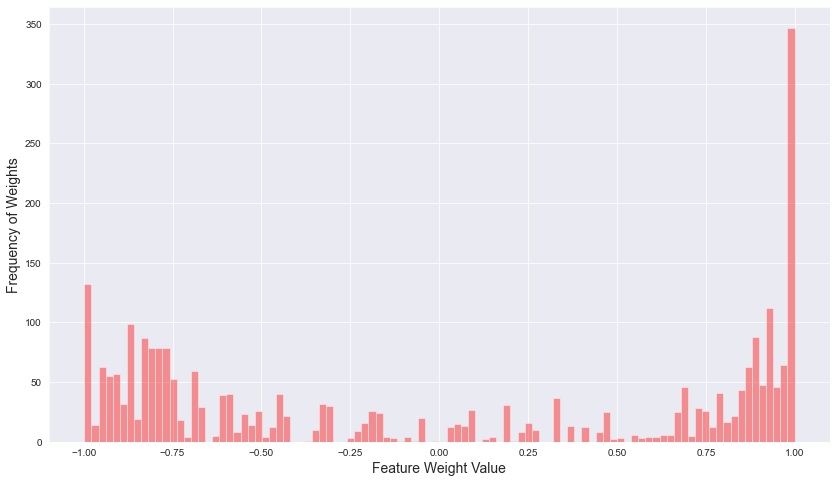

In [13]:
# The First level analysis simply check how the feature weights value look for OG
list_values = []
list_level_mean = []
for level_dict in og_json.values():
    for level in level_dict.keys():
        for phrase_dict in level_dict[level]:
            list_values.append(phrase_dict["value"])
            
# Sactter plot the feature weight values
sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.distplot(list_values, kde = False, color ='red', bins = 100)
plt.xlabel("Feature Weight Value", size=14)
plt.ylabel("Frequency of Weights", size=14)
plt.show()

In [14]:

word_weight_dict = {}
word_count = {}
for datapoint in og_json.keys():
    
    # Last node belonging to the datapoint
    last_level = list(og_json[datapoint].keys())[-1]
    
    for word_dict in og_json[datapoint][last_level]:
        if word_dict["word"] not in word_weight_dict.keys():
            word_weight_dict.update({word_dict["word"]: word_dict["value"]})
            word_count[word_dict["word"]] = 1
        else:
            word_count[word_dict["word"]] += 1
            key = word_dict["word"]+ "-" + str(word_count[word_dict["word"]])
            word_weight_dict.update({key: word_dict["value"]})

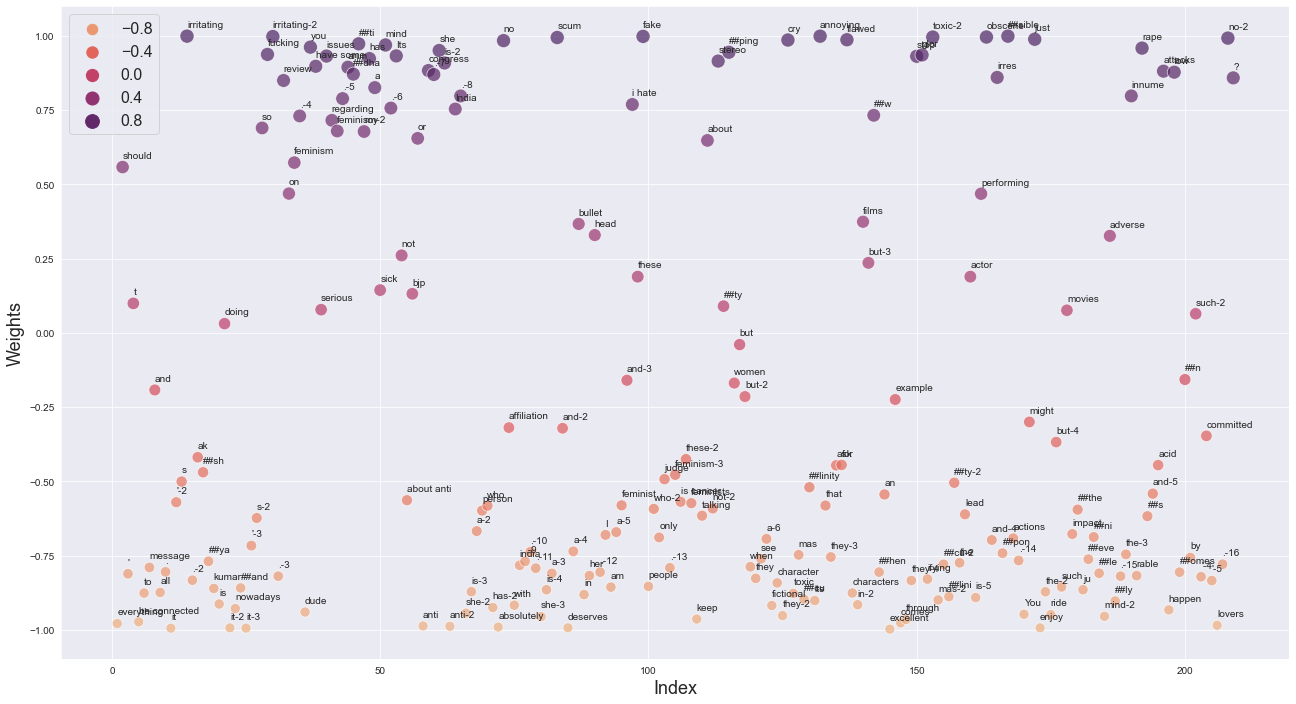

In [15]:
plt.figure(figsize=(22, 12))
sns.set_palette(sns.color_palette("husl", 8))
df_word_dict = pd.DataFrame(
    {
        "Words": list(word_weight_dict.keys()), 
        "Weights": list(word_weight_dict.values())
    }, 
    
    index=[x+1 for x in range(len(list(word_weight_dict.keys())))]
                           )

sns.scatterplot(x=df_word_dict.index, y='Weights', hue='Weights', data=df_word_dict, palette="flare", s=70, size='Weights', sizes=(100, 200), alpha=0.7)

x= df_word_dict.index.values
y=df_word_dict["Weights"].values
text = df_word_dict["Words"].values

for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i]+0.03), size=10)

plt.xlabel("Index", size=18)
plt.ylabel("Weights", size=18)
plt.legend(prop={'size': 16})
plt.show()

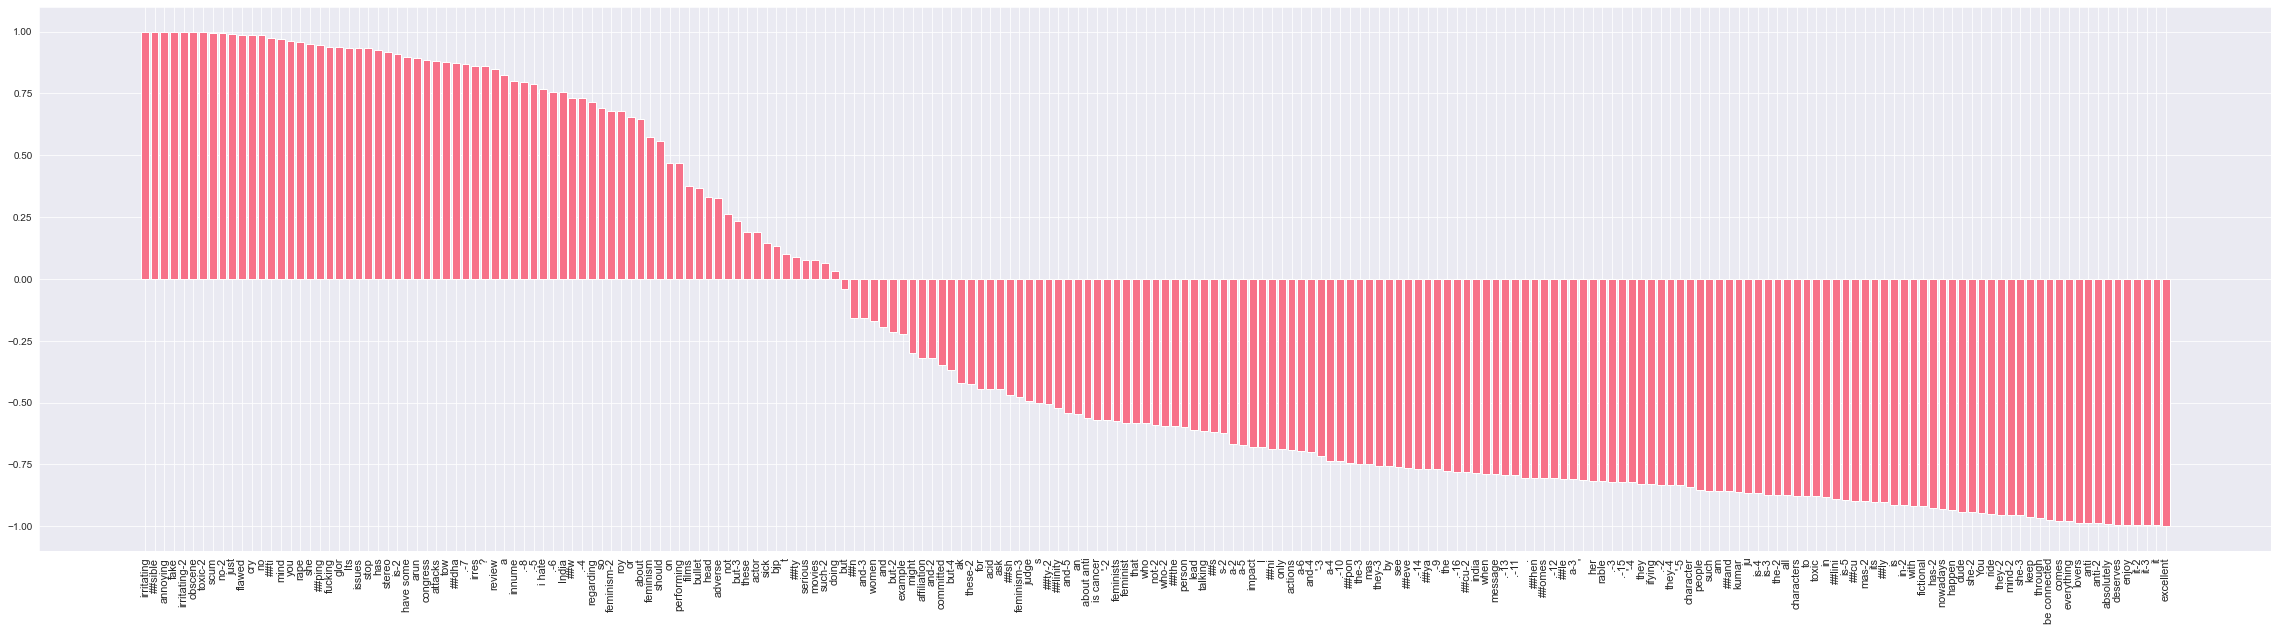

In [16]:
word_weight_dict  = {k: v for k, v in sorted(word_weight_dict.items(), key=lambda item: item[1], reverse=True)}
plt.figure(figsize=(40, 10))
plt.bar(range(len(word_weight_dict)), list(word_weight_dict.values()), align='center')
plt.xticks(range(len(word_weight_dict)), list(word_weight_dict.keys()), size=11, rotation=90)
plt.show()

The words feminism, scum, fake, annoying, toxic, fucking, irritating, hate, rape, bullet, head, adverse, have positive feature weight values. Further, consistent with the observations made for the above subsets, the words like feminism have negative feature weights too while the connotation of those words are in the derogatory sense itself. This again shows, the ambiguous nature of the explanation method for the same words for same premise but slightly different contexts. 

## CNG Explanation Weights Mining

In [17]:
# Load the OG explanation JSON
with open("./explanation-output/explain-CNG/CNG.json", "rb") as file:
    og_json = json.load(file)

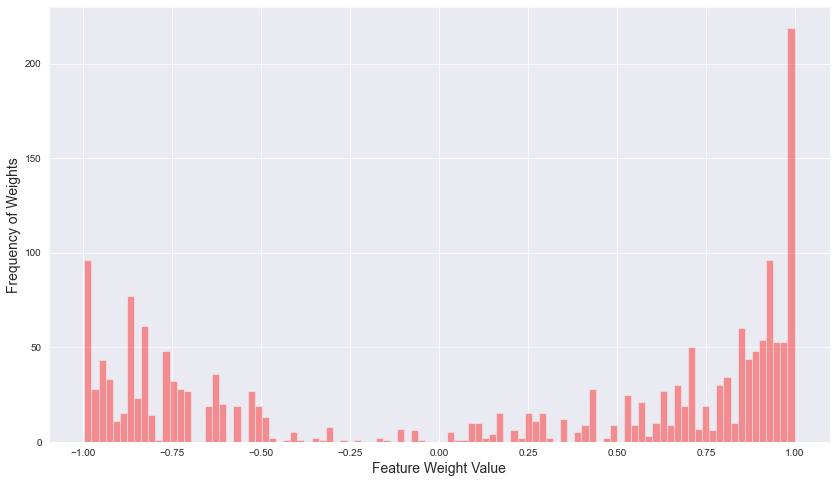

In [18]:
# The First level analysis simply check how the feature weights value look for OG
list_values = []
list_level_mean = []
for level_dict in og_json.values():
    for level in level_dict.keys():
        for phrase_dict in level_dict[level]:
            list_values.append(phrase_dict["value"])
            
# Sactter plot the feature weight values
sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.distplot(list_values, kde = False, color ='red', bins = 100)
plt.xlabel("Feature Weight Value", size=14)
plt.ylabel("Frequency of Weights", size=14)
plt.show()

In [19]:
word_weight_dict = {}
word_count = {}
for datapoint in og_json.keys():
    
    # Last node belonging to the datapoint
    last_level = list(og_json[datapoint].keys())[-1]
    
    for word_dict in og_json[datapoint][last_level]:
        if word_dict["word"] not in word_weight_dict.keys():
            word_weight_dict.update({word_dict["word"]: word_dict["value"]})
            word_count[word_dict["word"]] = 1
        else:
            word_count[word_dict["word"]] += 1
            key = word_dict["word"]+ "-" + str(word_count[word_dict["word"]])
            word_weight_dict.update({key: word_dict["value"]})

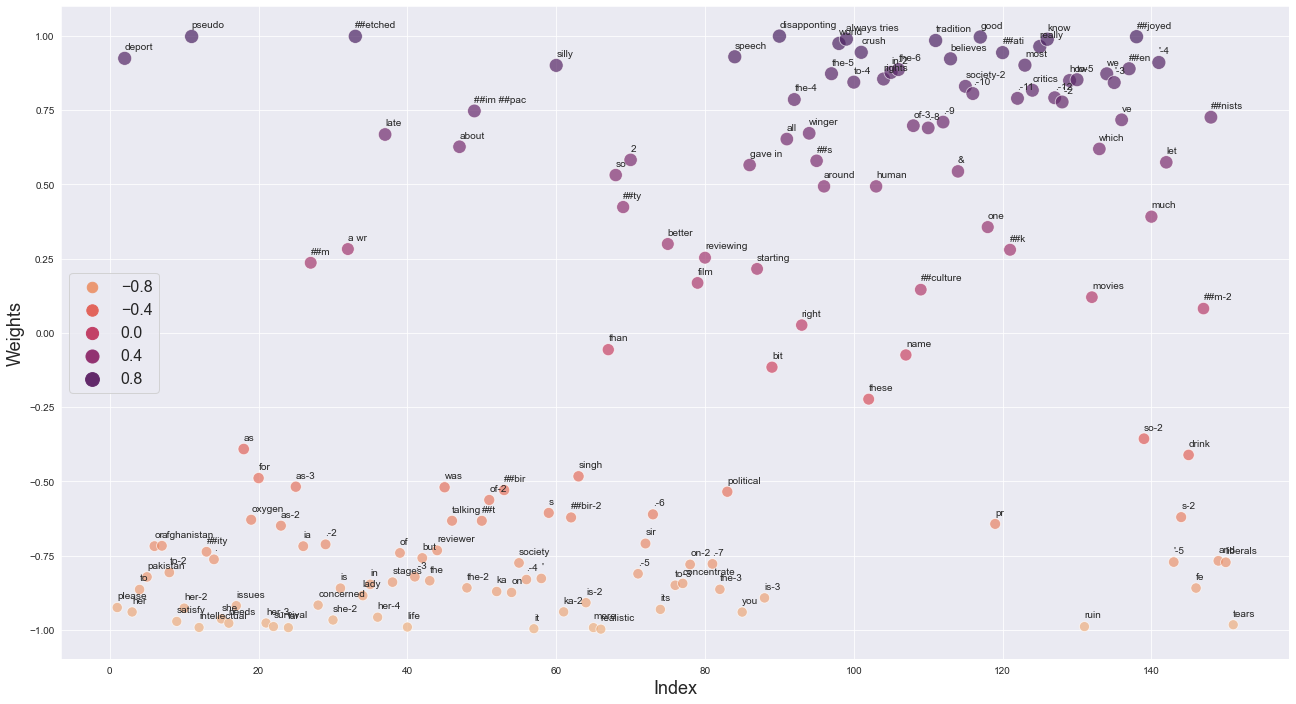

In [20]:
plt.figure(figsize=(22, 12))
sns.set_palette(sns.color_palette("husl", 8))
df_word_dict = pd.DataFrame(
    {
        "Words": list(word_weight_dict.keys()), 
        "Weights": list(word_weight_dict.values())
    }, 
    
    index=[x+1 for x in range(len(list(word_weight_dict.keys())))]
                           )

sns.scatterplot(x=df_word_dict.index, y='Weights', hue='Weights', data=df_word_dict, palette="flare", s=70, size='Weights', sizes=(100, 200), alpha=0.7)

x= df_word_dict.index.values
y=df_word_dict["Weights"].values
text = df_word_dict["Words"].values

for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i]+0.03), size=10)

plt.xlabel("Index", size=18)
plt.ylabel("Weights", size=18)
plt.legend(prop={'size': 16})
plt.show()

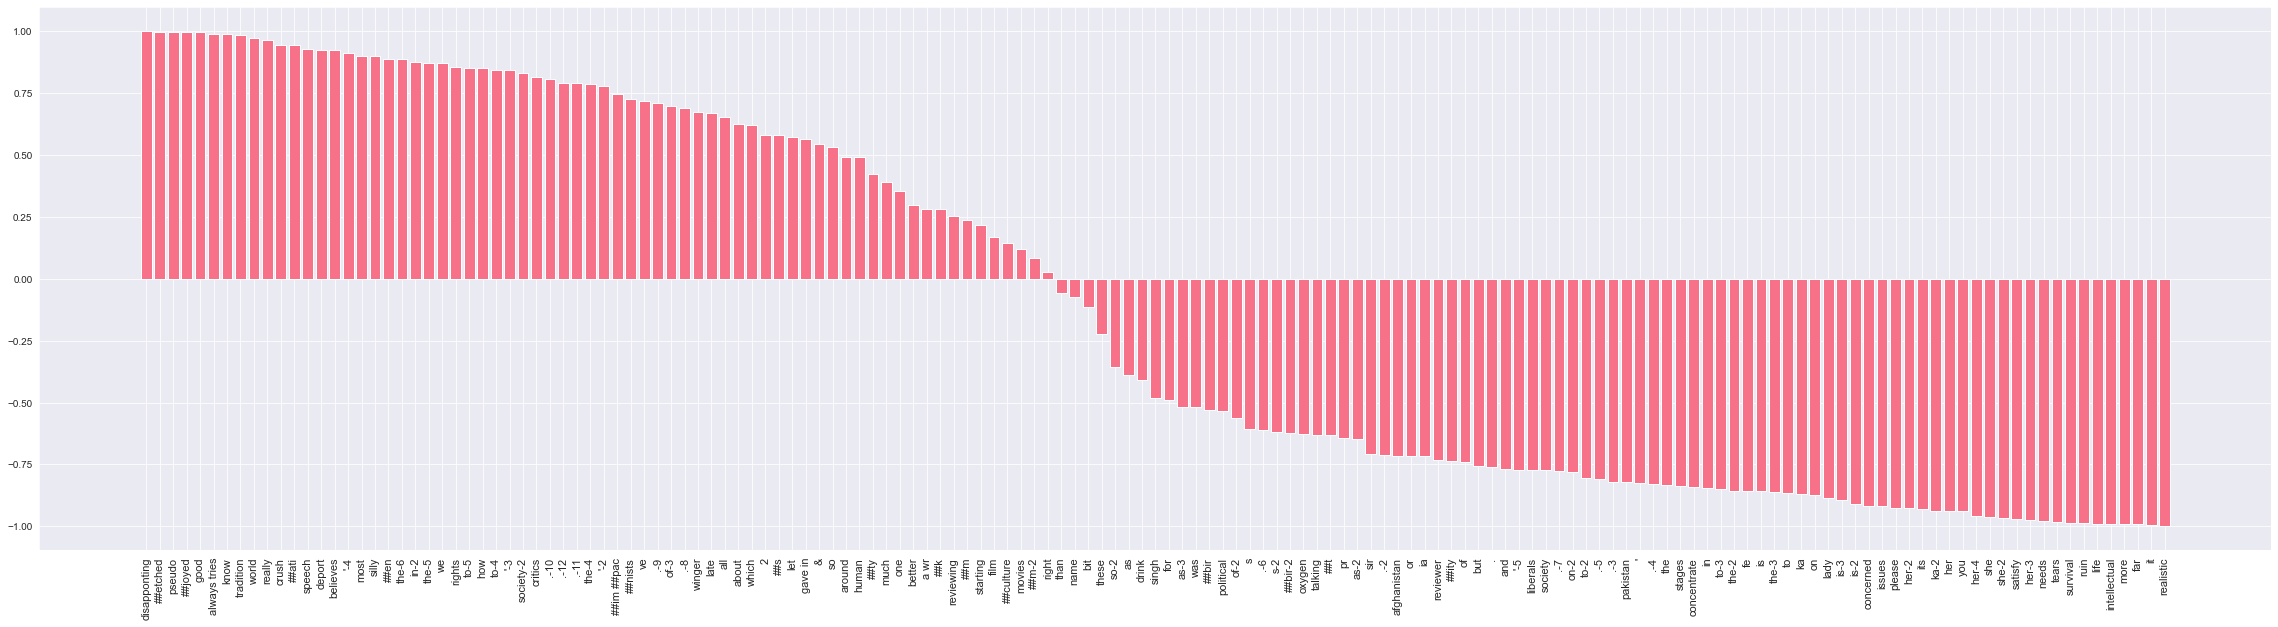

In [21]:
word_weight_dict  = {k: v for k, v in sorted(word_weight_dict.items(), key=lambda item: item[1], reverse=True)}
plt.figure(figsize=(40, 10))
plt.bar(range(len(word_weight_dict)), list(word_weight_dict.values()), align='center')
plt.xticks(range(len(word_weight_dict)), list(word_weight_dict.keys()), size=11, rotation=90)
plt.show()

There are words like about, late, better, than, one, much, movies,  ##m, ##im, ##pac etc.,  they too have been assigned high positive feature weight by the explanation generator method which are either noise words or low information value words. This reciprocatively speaks of the ambiguity that the explanation method possesses in it’s generated reasonings. There are words like Afghanistan, Pakistan, political, tears, liberals etc. which have been assigned high negative weights for the explanator though when inspected for the connotation of these words, they should have been part of the high positive feature weight words. Referring to the above cited example, where the source expresses his desires to sending her to Pakistan or Afghanistan, the name of these places reflect or symbolises war or conflict zones where individuals should be sent out for sufferings. Therefore, they should be assigned high positive feature values.

## NNG Explanation Weights Mining

In [22]:
# Load the OG explanation JSON
with open("./explanation-output/explain-NNG/NNG.json", "rb") as file:
    og_json = json.load(file)

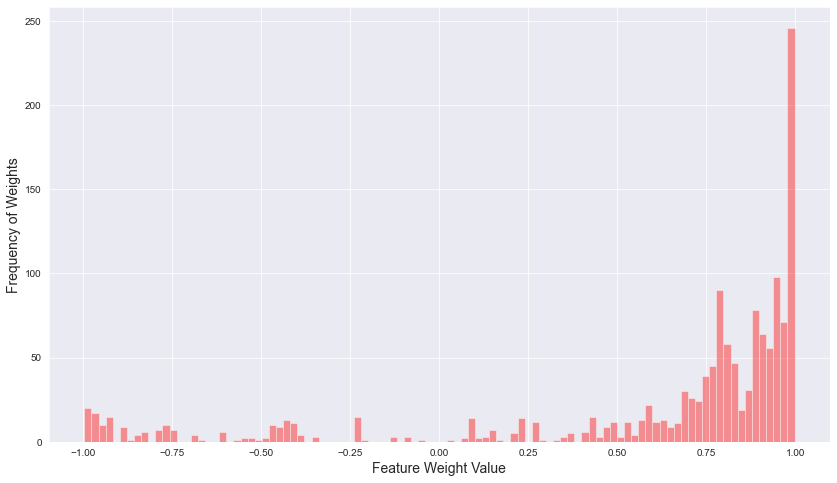

In [23]:
# The First level analysis simply check how the feature weights value look for OG
list_values = []
list_level_mean = []
for level_dict in og_json.values():
    for level in level_dict.keys():
        for phrase_dict in level_dict[level]:
            list_values.append(phrase_dict["value"])
            
# Sactter plot the feature weight values
sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.distplot(list_values, kde = False, color ='red', bins = 100)
plt.xlabel("Feature Weight Value", size=14)
plt.ylabel("Frequency of Weights", size=14)
plt.show()

In [24]:
word_weight_dict = {}
word_count = {}
for datapoint in og_json.keys():
    
    # Last node belonging to the datapoint
    last_level = list(og_json[datapoint].keys())[-1]
    
    for word_dict in og_json[datapoint][last_level]:
        if word_dict["word"] not in word_weight_dict.keys():
            word_weight_dict.update({word_dict["word"]: word_dict["value"]})
            word_count[word_dict["word"]] = 1
        else:
            word_count[word_dict["word"]] += 1
            key = word_dict["word"]+ "-" + str(word_count[word_dict["word"]])
            word_weight_dict.update({key: word_dict["value"]})

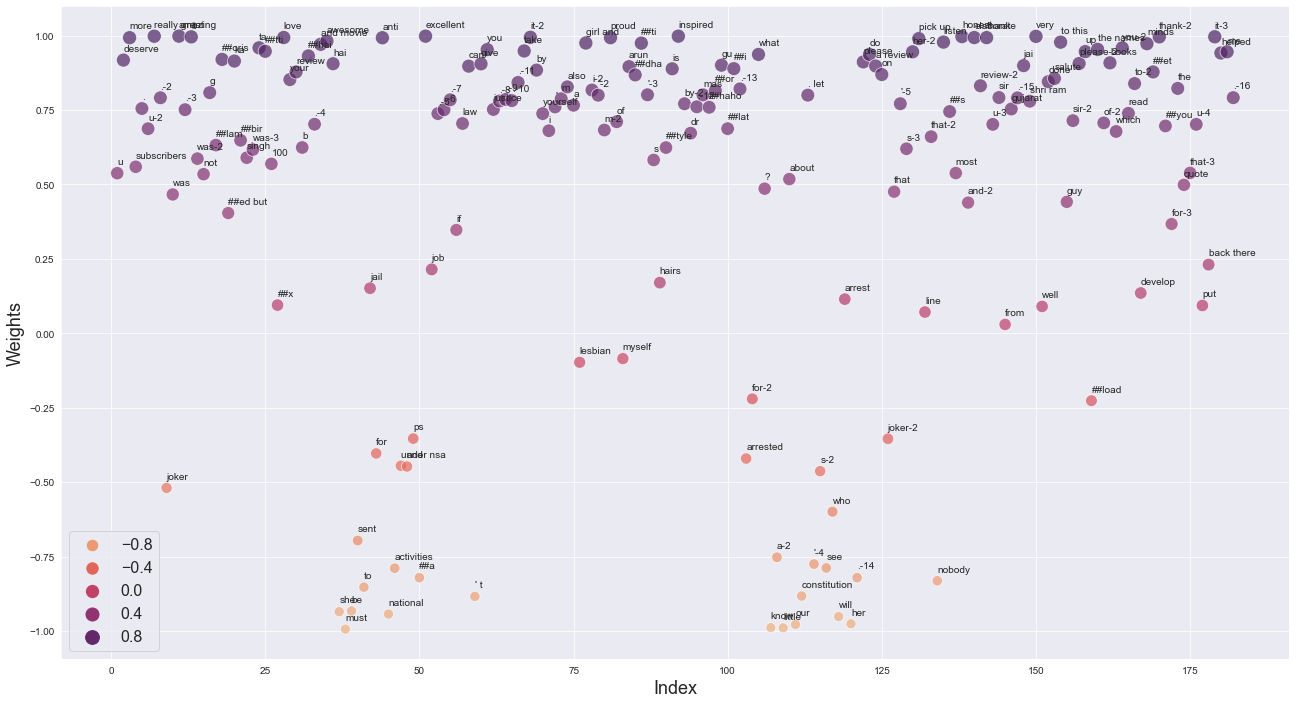

In [25]:
plt.figure(figsize=(22, 12))
sns.set_palette(sns.color_palette("husl", 8))
df_word_dict = pd.DataFrame(
    {
        "Words": list(word_weight_dict.keys()), 
        "Weights": list(word_weight_dict.values())
    }, 
    
    index=[x+1 for x in range(len(list(word_weight_dict.keys())))]
                           )

sns.scatterplot(x=df_word_dict.index, y='Weights', hue='Weights', data=df_word_dict, palette="flare", s=70, size='Weights', sizes=(100, 200), alpha=0.7)

x= df_word_dict.index.values
y=df_word_dict["Weights"].values
text = df_word_dict["Words"].values

for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i]+0.03), size=10)

plt.xlabel("Index", size=18)
plt.ylabel("Weights", size=18)
plt.legend(prop={'size': 16})
plt.show()

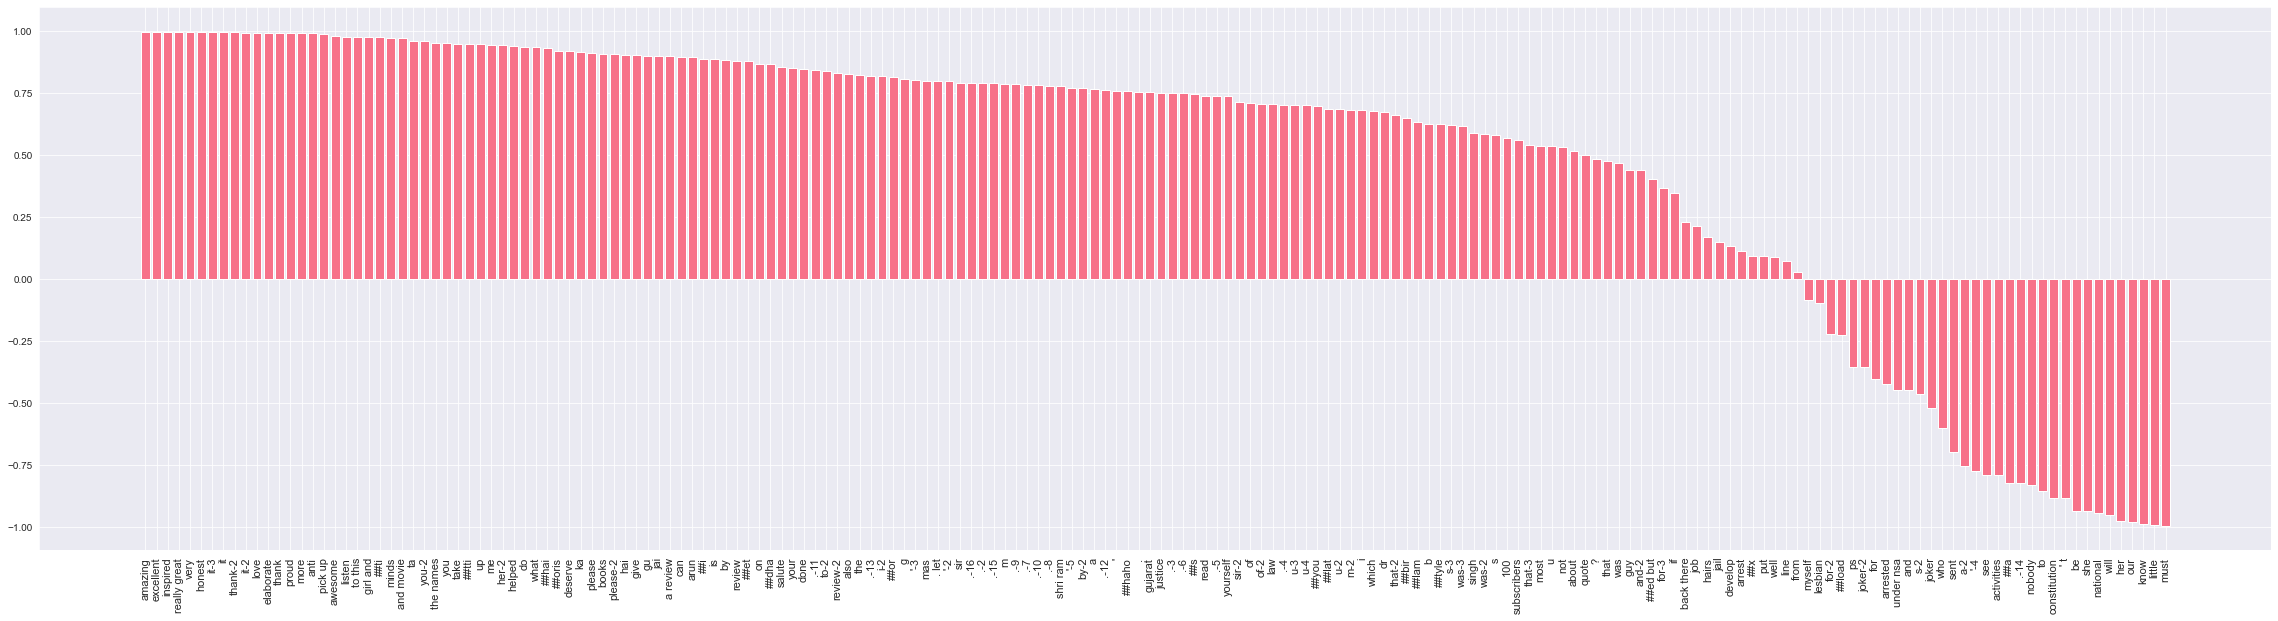

In [26]:
word_weight_dict  = {k: v for k, v in sorted(word_weight_dict.items(), key=lambda item: item[1], reverse=True)}
plt.figure(figsize=(40, 10))
plt.bar(range(len(word_weight_dict)), list(word_weight_dict.values()), align='center')
plt.xticks(range(len(word_weight_dict)), list(word_weight_dict.keys()), size=11, rotation=90)
plt.show()

Total of 82% of the words encountered in the subset have positive feature weights. The interesting observation here is, why certain words are given negative weights are the explanator system while the overall sense of the text itself is neutral. The words like nobody, will, her, joker, who, a, must, sent, to, she, must, have been assigned negative weights while in the regular use of these words the connotation next to always have a neutral stance. Another observation which is consistent with the previous subsets, there are words to be found which have been assigned positive and negative feature weights across different texts. In this subset of the data points, the word “a” has evidence to be part of the high positive feature weights as well as negative feature weights, though the word “a” is a neutral word in whatever context it is used. Overall, there are inconsistencies observed in the explanations generated by the HEDGE localized to the subset of the data points itself and over the cognitive abilities of human to reason about the classification of a text under a certain category. 

# -------------------------------------------------------------------------------------------

# Sentiment Scores

In [27]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
import urllib.request

In [28]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
 
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [29]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

In [30]:
from transformers import RobertaForSequenceClassification
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

model = RobertaForSequenceClassification.from_pretrained(MODEL, num_labels= 3)

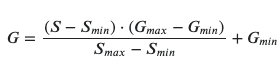


In [31]:
def range_shift(val):
    s = val
    smin = 0
    smax = 0.99
    gmax = 1
    gmin = -1
    
    new_val = ((s - smin)*(gmax-gmin) / (smax - smin)) + gmin
    
    return new_val


def predict(text):
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    # neg : 0 , neu : 1, pos : 2
    scores = softmax(scores)
    
    
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    best = ranking[0]
    best_score = scores[best]
    
    return best, best_score



def prob_to_score(out_tensor):
    
    best_idx = out_tensor[0]
    best_score = out_tensor[1]
    
    if best_idx == 0:
        score = range_shift(1-best_score)
    
    elif best_idx == 1:
        score = random.uniform(0.01, 0.2)
   
    else:
        score = range_shift(best_score)
    
    return score
        


def get_senti_score(word):
    out_tensor = predict(word)
    score = prob_to_score(out_tensor)
    return score


## OG Sentiment Score

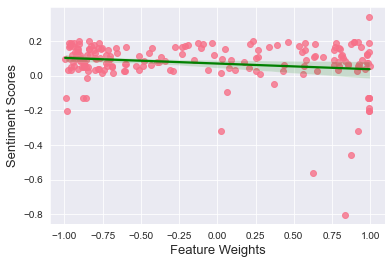

Pearson Correlation :  (-0.1854307088327844, 0.010425970787242425)
Spearman Correlation :  SpearmanrResult(correlation=-0.0986462742798667, pvalue=0.1757117591517987)
kendalltau Correlation :  KendalltauResult(correlation=-0.06375924397254079, pvalue=0.19176235134087105)
1.0
{'x': 'weights', 'y': 'senti', 'ppscore': 0, 'case': 'regression', 'is_valid_score': True, 'metric': 'mean absolute error', 'baseline_score': 0.07626931807503422, 'model_score': 0.11313793267002102, 'model': DecisionTreeRegressor()}
{'x': 'senti', 'y': 'weights', 'ppscore': 0, 'case': 'regression', 'is_valid_score': True, 'metric': 'mean absolute error', 'baseline_score': 0.6612803859832256, 'model_score': 0.8537438428030244, 'model': DecisionTreeRegressor()}


In [35]:
# Load the OG explanation JSON
with open("./explanation-output/explain-OG/OG.json", "rb") as file:
    og_json = json.load(file)
    
list_weights = []
list_senti = []
list_words = []
for datapoint in og_json.keys():
    
    # Last node belonging to the datapoint
    last_level = list(og_json[datapoint].keys())[-1]
    
    for word_dict in og_json[datapoint][last_level]:
        score = get_senti_score(word_dict["word"])
        word_dict.update({"senti_score": score})
        list_words.append(word_dict["word"])
        list_weights.append(word_dict["value"])
        list_senti.append(word_dict["senti_score"])
    

sns.regplot(x=list_weights, y=list_senti, line_kws={"color": "green"})
plt.xlabel("Feature Weights", size=13)
plt.ylabel("Sentiment Scores", size=13)
plt.show()
print("Pearson Correlation : ", pearsonr(list_weights, list_senti))
print("Spearman Correlation : ", spearmanr(list_weights, list_senti))
print("kendalltau Correlation : ", kendalltau(list_weights, list_senti))
print(canova(list_weights, list_senti))
df_expln = pd.DataFrame({"weights": list_weights, "senti": list_senti})
print(pps.score(df_expln, "weights", "senti"))
print(pps.score(df_expln, "senti", "weights"))

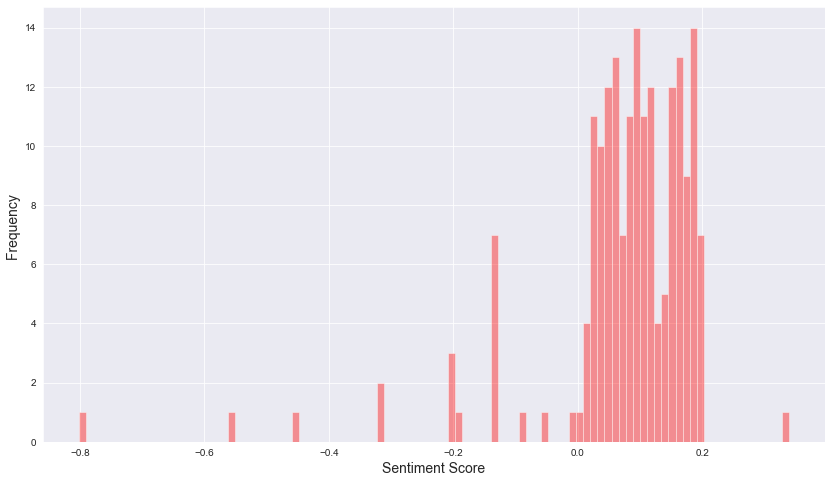

In [36]:
# Sactter plot the feature weight values
sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.distplot(list_senti, kde = False, color ='red', bins = 100)
plt.xlabel("Sentiment Score", size=14)
plt.ylabel("Frequency ", size=14)
plt.show()

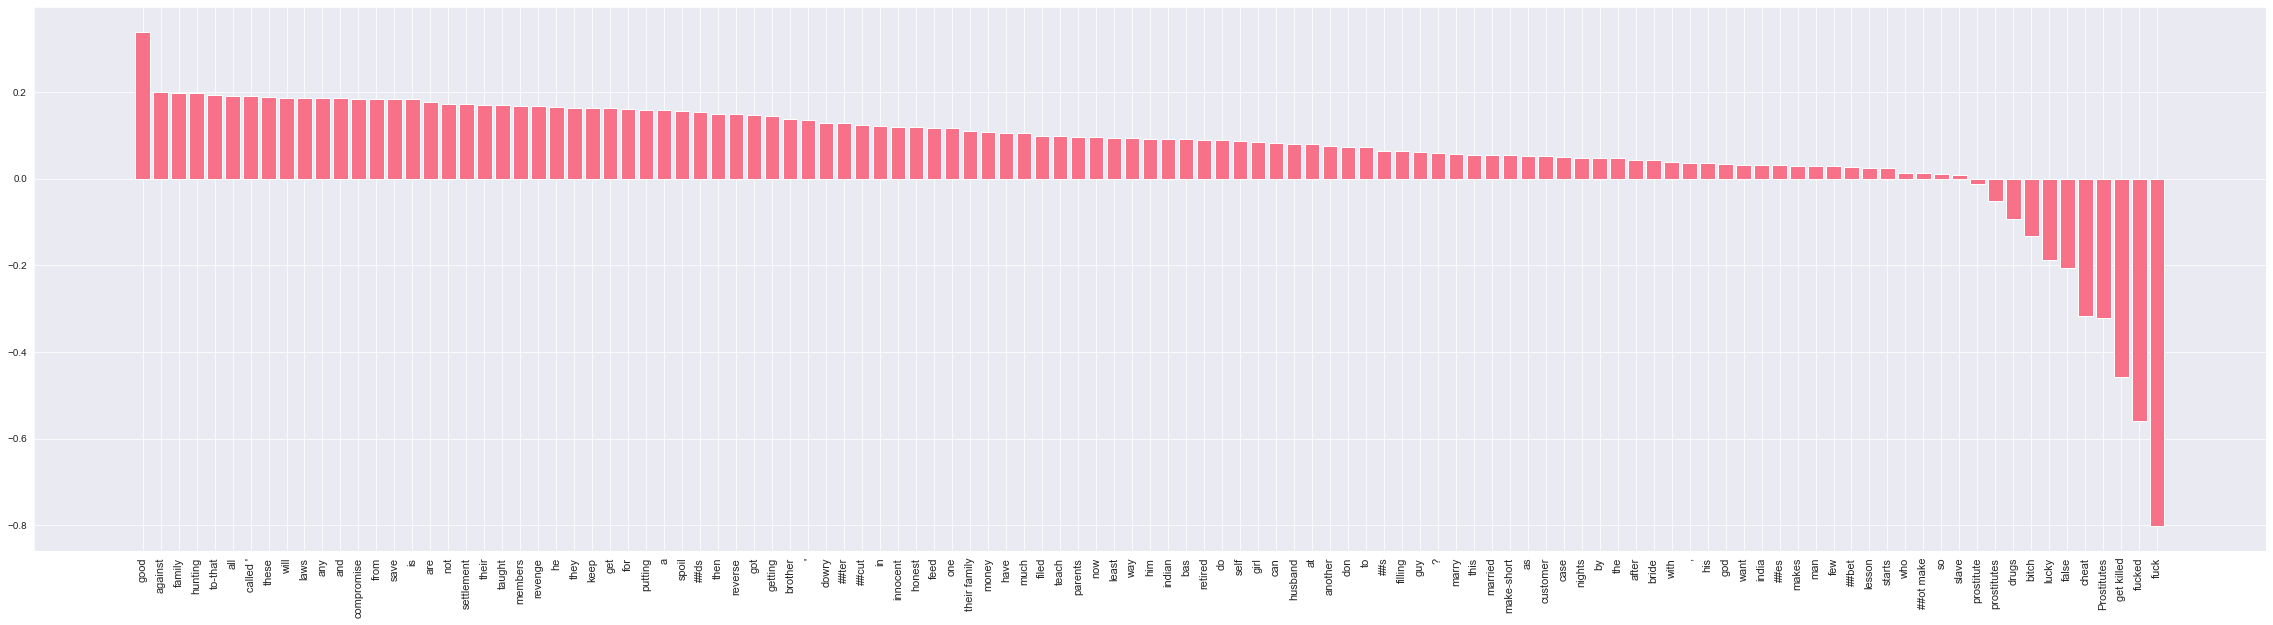

In [37]:
word_senti_dict = dict(zip(list_words, list_senti))
word_senti_dict  = {k: v for k, v in sorted(word_senti_dict.items(), key=lambda item: item[1], reverse=True)}
plt.figure(figsize=(40, 10))
plt.bar(range(len(word_senti_dict.keys())), word_senti_dict.values(), align='center')
plt.xticks(range(len(word_senti_dict.keys())), word_senti_dict.keys(), size=11, rotation=90)
plt.show()

## NG Sentiment Score


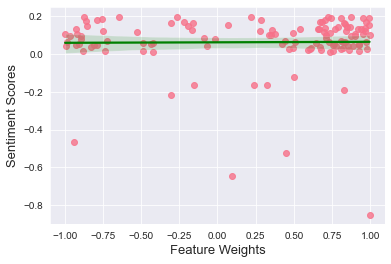

Pearson Correlation :  (0.011673509784409179, 0.8984535699728522)
Spearman Correlation :  SpearmanrResult(correlation=0.061314722474151415, pvalue=0.502282330649916)
kendalltau Correlation :  KendalltauResult(correlation=0.04309235132046902, pvalue=0.4816121046791598)
1.0
{'x': 'weights', 'y': 'senti', 'ppscore': 0, 'case': 'regression', 'is_valid_score': True, 'metric': 'mean absolute error', 'baseline_score': 0.08197315508999581, 'model_score': 0.14235807723898036, 'model': DecisionTreeRegressor()}
{'x': 'senti', 'y': 'weights', 'ppscore': 0, 'case': 'regression', 'is_valid_score': True, 'metric': 'mean absolute error', 'baseline_score': 0.556279851734394, 'model_score': 0.741500443625047, 'model': DecisionTreeRegressor()}


In [38]:
# Load the OG explanation JSON
with open("./explanation-output/explain-NG/NG.json", "rb") as file:
    og_json = json.load(file)
    
list_weights = []
list_senti = []
list_words = []
for datapoint in og_json.keys():
    
    # Last node belonging to the datapoint
    last_level = list(og_json[datapoint].keys())[-1]
    
    for word_dict in og_json[datapoint][last_level]:
        score = get_senti_score(word_dict["word"])
        word_dict.update({"senti_score": score})
        list_words.append(word_dict["word"])
        list_weights.append(word_dict["value"])
        list_senti.append(word_dict["senti_score"])
    

sns.regplot(x=list_weights, y=list_senti, line_kws={"color": "green"})
plt.xlabel("Feature Weights", size=13)
plt.ylabel("Sentiment Scores", size=13)
plt.show()
print("Pearson Correlation : ", pearsonr(list_weights, list_senti))
print("Spearman Correlation : ", spearmanr(list_weights, list_senti))
print("kendalltau Correlation : ", kendalltau(list_weights, list_senti))
print(canova(list_weights, list_senti))
df_expln = pd.DataFrame({"weights": list_weights, "senti": list_senti})
print(pps.score(df_expln, "weights", "senti"))
print(pps.score(df_expln, "senti", "weights"))

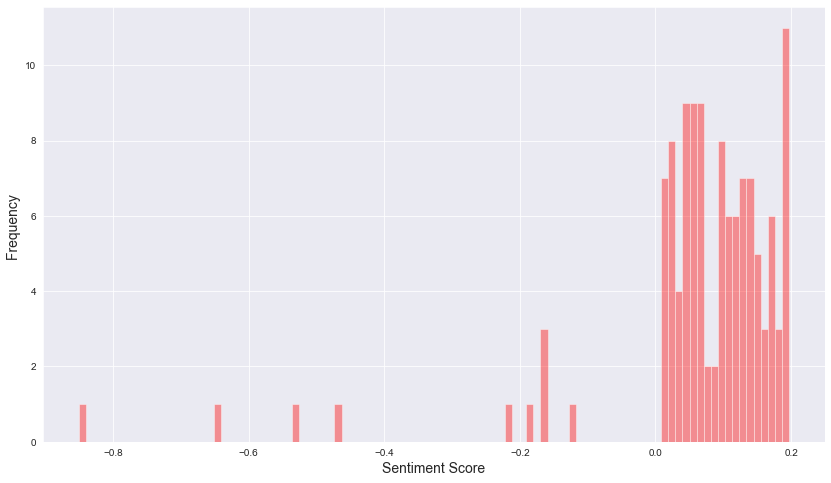

In [39]:
# Sactter plot the feature weight values
sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.distplot(list_senti, kde = False, color ='red', bins = 100)
plt.xlabel("Sentiment Score", size=14)
plt.ylabel("Frequency ", size=14)
plt.show()

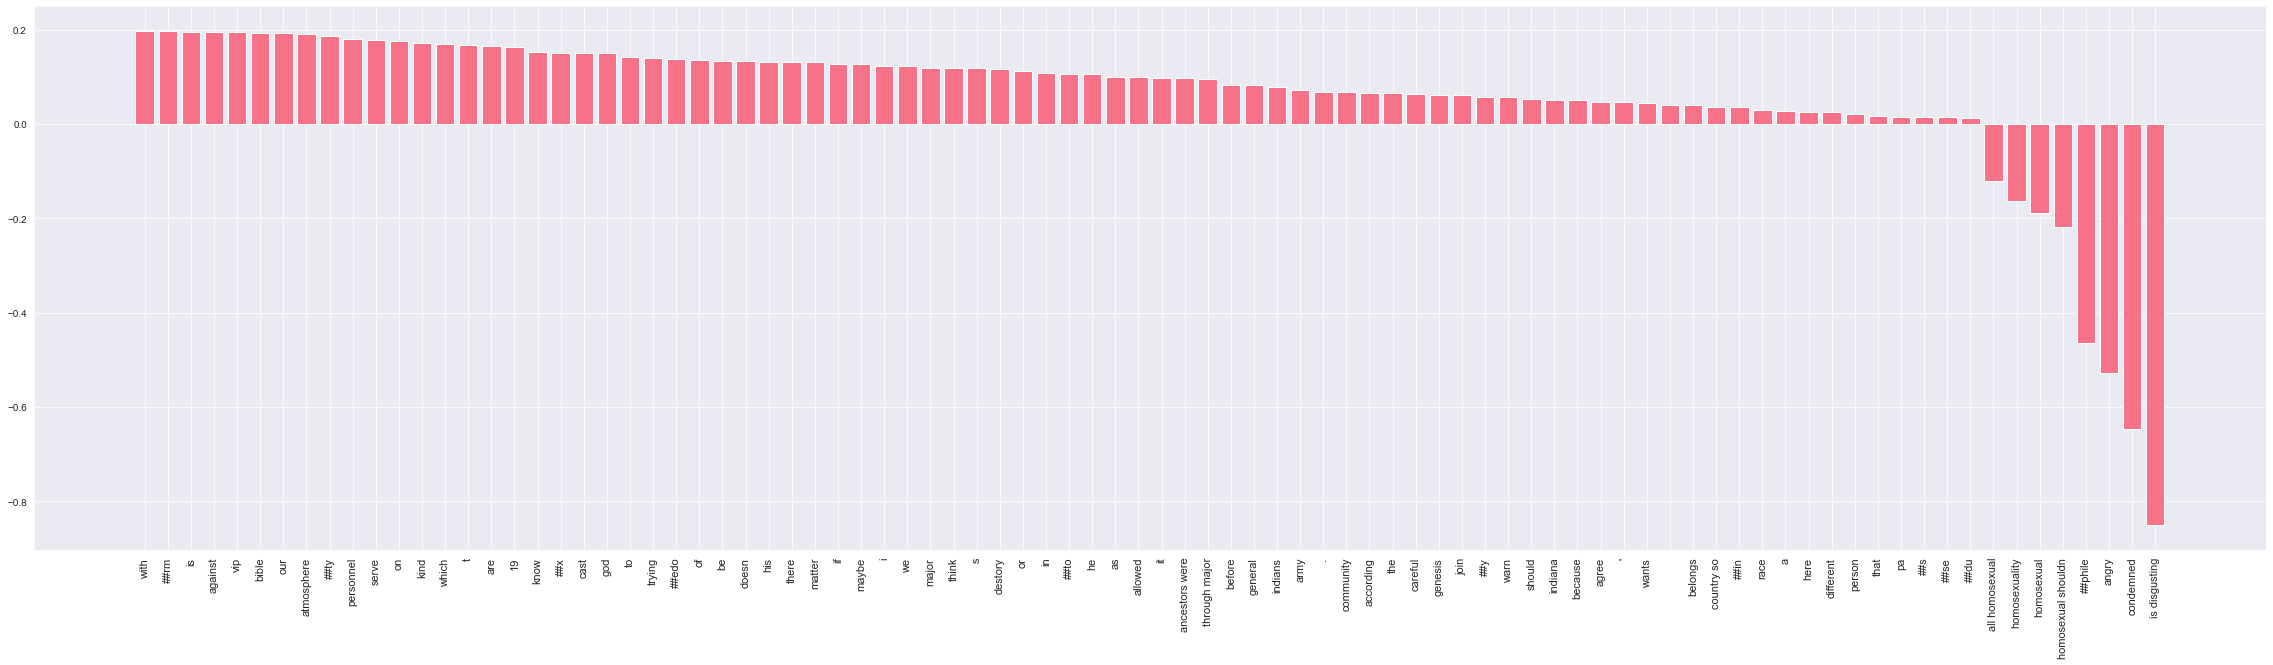

In [40]:
word_senti_dict = dict(zip(list_words, list_senti))
word_senti_dict  = {k: v for k, v in sorted(word_senti_dict.items(), key=lambda item: item[1], reverse=True)}
plt.figure(figsize=(40, 10))
plt.bar(range(len(word_senti_dict.keys())), word_senti_dict.values(), align='center')
plt.xticks(range(len(word_senti_dict.keys())), word_senti_dict.keys(), size=11, rotation=90)
plt.show()

## ONG Sentiment Score

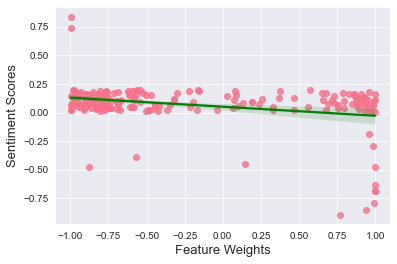

Pearson Correlation :  (-0.30967105619703195, 5.050687652746026e-06)
Spearman Correlation :  SpearmanrResult(correlation=-0.19764531288973236, pvalue=0.004123710469480534)
kendalltau Correlation :  KendalltauResult(correlation=-0.13660309649569277, pvalue=0.003309119038138137)
1.0
{'x': 'weights', 'y': 'senti', 'ppscore': 0, 'case': 'regression', 'is_valid_score': True, 'metric': 'mean absolute error', 'baseline_score': 0.0890631164753094, 'model_score': 0.1376559981393366, 'model': DecisionTreeRegressor()}
{'x': 'senti', 'y': 'weights', 'ppscore': 0, 'case': 'regression', 'is_valid_score': True, 'metric': 'mean absolute error', 'baseline_score': 0.5955495228946351, 'model_score': 0.718762654561248, 'model': DecisionTreeRegressor()}


In [41]:
# Load the OG explanation JSON
with open("./explanation-output/explain-ONG/ONG.json", "rb") as file:
    og_json = json.load(file)
    
list_weights = []
list_senti = []
list_words = []
for datapoint in og_json.keys():
    
    # Last node belonging to the datapoint
    last_level = list(og_json[datapoint].keys())[-1]
    
    for word_dict in og_json[datapoint][last_level]:
        score = get_senti_score(word_dict["word"])
        word_dict.update({"senti_score": score})
        list_words.append(word_dict["word"])
        list_weights.append(word_dict["value"])
        list_senti.append(word_dict["senti_score"])
    

sns.regplot(x=list_weights, y=list_senti, line_kws={"color": "green"})
plt.xlabel("Feature Weights", size=13)
plt.ylabel("Sentiment Scores", size=13)
plt.show()
print("Pearson Correlation : ", pearsonr(list_weights, list_senti))
print("Spearman Correlation : ", spearmanr(list_weights, list_senti))
print("kendalltau Correlation : ", kendalltau(list_weights, list_senti))
print(canova(list_weights, list_senti))
df_expln = pd.DataFrame({"weights": list_weights, "senti": list_senti})
print(pps.score(df_expln, "weights", "senti"))
print(pps.score(df_expln, "senti", "weights"))

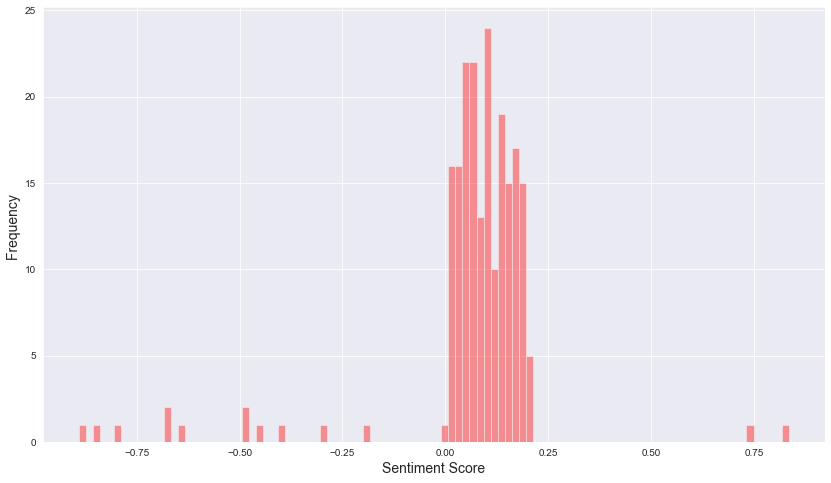

In [42]:
# Sactter plot the feature weight values
sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.distplot(list_senti, kde = False, color ='red', bins = 100)
plt.xlabel("Sentiment Score", size=14)
plt.ylabel("Frequency ", size=14)
plt.show()

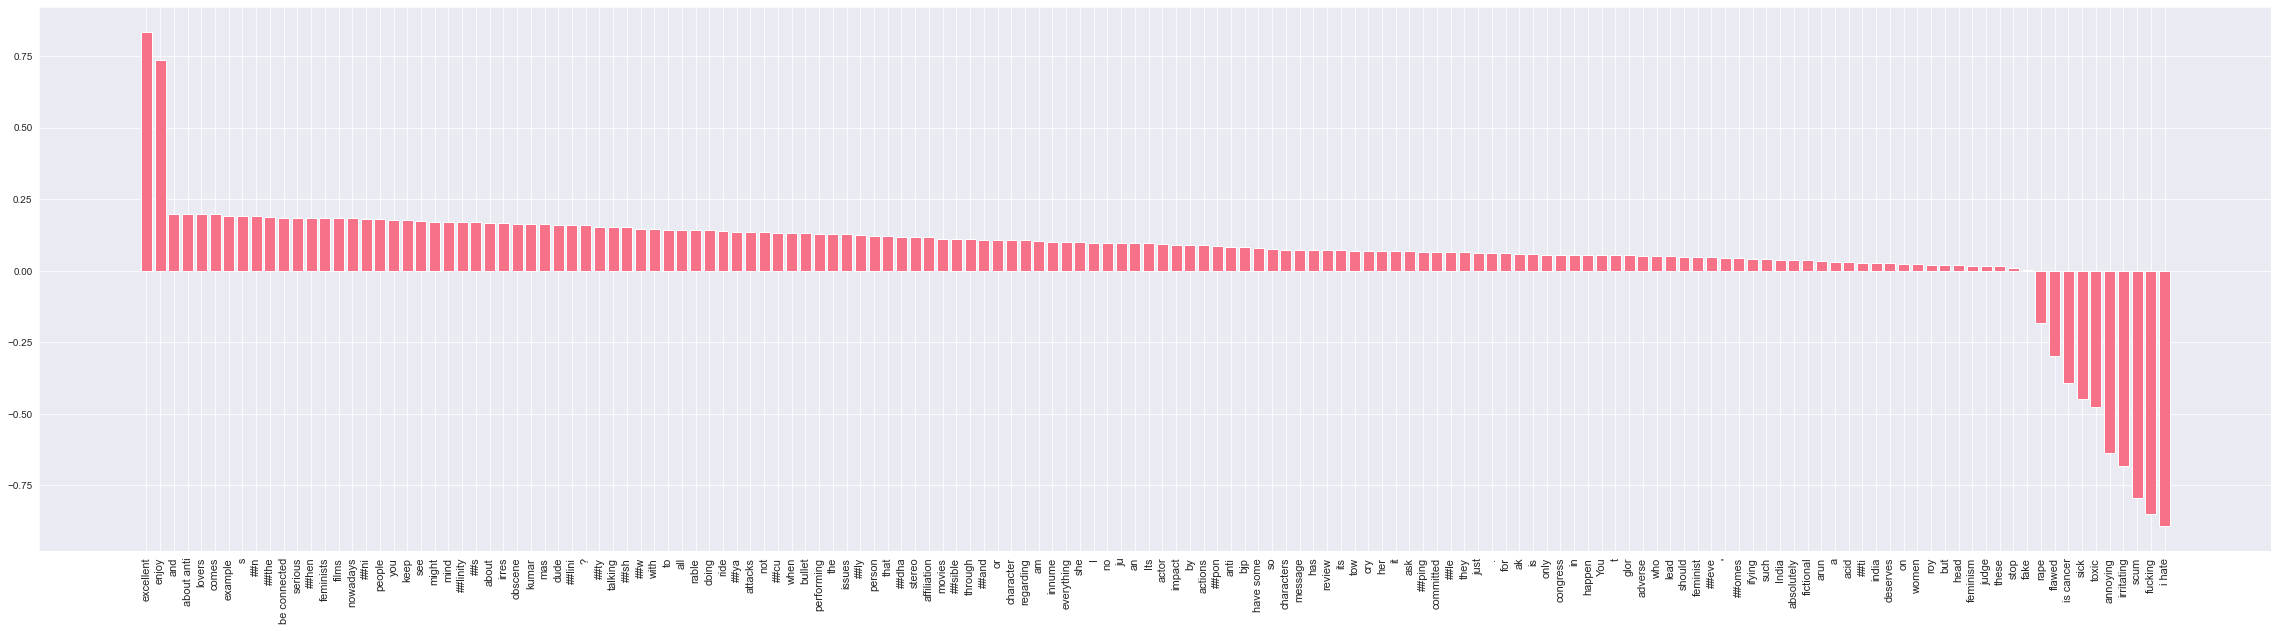

In [43]:
word_senti_dict = dict(zip(list_words, list_senti))
word_senti_dict  = {k: v for k, v in sorted(word_senti_dict.items(), key=lambda item: item[1], reverse=True)}
plt.figure(figsize=(40, 10))
plt.bar(range(len(word_senti_dict.keys())), word_senti_dict.values(), align='center')
plt.xticks(range(len(word_senti_dict.keys())), word_senti_dict.keys(), size=11, rotation=90)
plt.show()

## CNG Sentiment Score

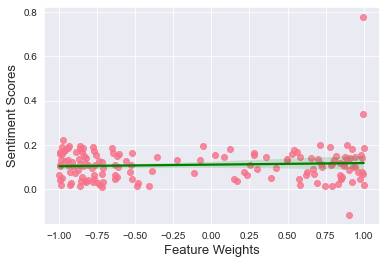

Pearson Correlation :  (0.06665036552752675, 0.4161537368893065)
Spearman Correlation :  SpearmanrResult(correlation=-0.037703032415475776, pvalue=0.6457917829941353)
kendalltau Correlation :  KendalltauResult(correlation=-0.023399558498896248, pvalue=0.6698438398653184)
1.0
{'x': 'weights', 'y': 'senti', 'ppscore': 0, 'case': 'regression', 'is_valid_score': True, 'metric': 'mean absolute error', 'baseline_score': 0.05331788146102077, 'model_score': 0.07579998599584244, 'model': DecisionTreeRegressor()}
{'x': 'senti', 'y': 'weights', 'ppscore': 0, 'case': 'regression', 'is_valid_score': True, 'metric': 'mean absolute error', 'baseline_score': 0.7008705225261237, 'model_score': 0.9533506017840689, 'model': DecisionTreeRegressor()}


In [44]:
# Load the OG explanation JSON
with open("./explanation-output/explain-CNG/CNG.json", "rb") as file:
    og_json = json.load(file)
    
list_weights = []
list_senti = []
list_words = []
for datapoint in og_json.keys():
    
    # Last node belonging to the datapoint
    last_level = list(og_json[datapoint].keys())[-1]
    
    for word_dict in og_json[datapoint][last_level]:
        score = get_senti_score(word_dict["word"])
        word_dict.update({"senti_score": score})
        list_words.append(word_dict["word"])
        list_weights.append(word_dict["value"])
        list_senti.append(word_dict["senti_score"])
    

sns.regplot(x=list_weights, y=list_senti, line_kws={"color": "green"})
plt.xlabel("Feature Weights", size=13)
plt.ylabel("Sentiment Scores", size=13)
plt.show()
print("Pearson Correlation : ", pearsonr(list_weights, list_senti))
print("Spearman Correlation : ", spearmanr(list_weights, list_senti))
print("kendalltau Correlation : ", kendalltau(list_weights, list_senti))
print(canova(list_weights, list_senti))
df_expln = pd.DataFrame({"weights": list_weights, "senti": list_senti})
print(pps.score(df_expln, "weights", "senti"))
print(pps.score(df_expln, "senti", "weights"))

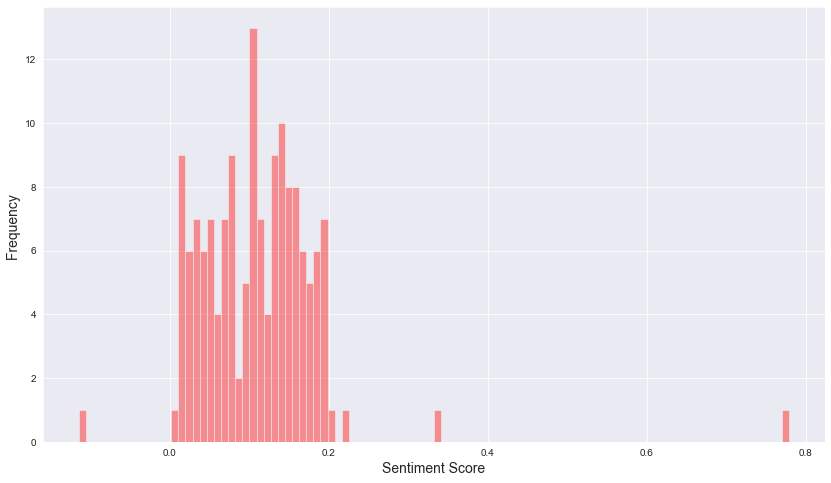

In [45]:
# Sactter plot the feature weight values
sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.distplot(list_senti, kde = False, color ='red', bins = 100)
plt.xlabel("Sentiment Score", size=14)
plt.ylabel("Frequency ", size=14)
plt.show()

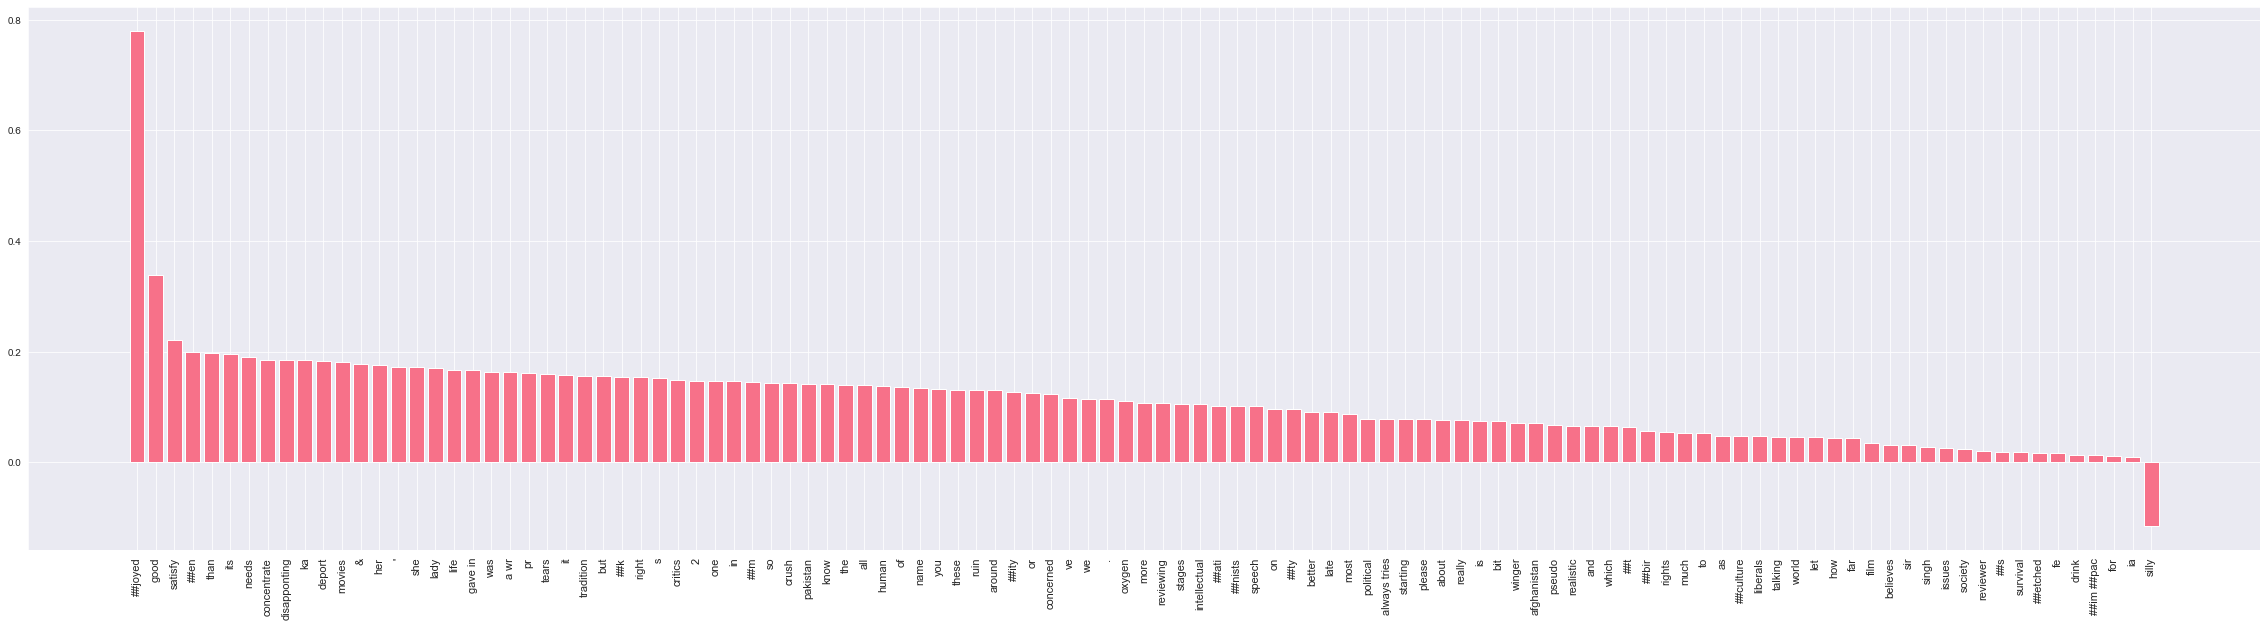

In [46]:
word_senti_dict = dict(zip(list_words, list_senti))
word_senti_dict  = {k: v for k, v in sorted(word_senti_dict.items(), key=lambda item: item[1], reverse=True)}
plt.figure(figsize=(40, 10))
plt.bar(range(len(word_senti_dict.keys())), word_senti_dict.values(), align='center')
plt.xticks(range(len(word_senti_dict.keys())), word_senti_dict.keys(), size=11, rotation=90)
plt.show()

## NNG Sentiment Score

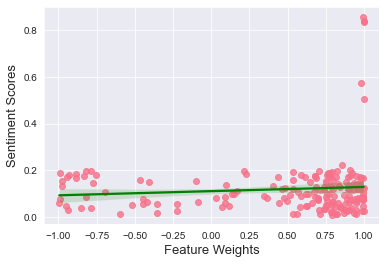

Pearson Correlation :  (0.09067343637577449, 0.22347765572655184)
Spearman Correlation :  SpearmanrResult(correlation=0.027492944625452716, pvalue=0.7125643503035979)
kendalltau Correlation :  KendalltauResult(correlation=0.022464406069669395, pvalue=0.6525328689869433)
1.0
{'x': 'weights', 'y': 'senti', 'ppscore': 0, 'case': 'regression', 'is_valid_score': True, 'metric': 'mean absolute error', 'baseline_score': 0.0636672302280251, 'model_score': 0.095297476322614, 'model': DecisionTreeRegressor()}
{'x': 'senti', 'y': 'weights', 'ppscore': 0, 'case': 'regression', 'is_valid_score': True, 'metric': 'mean absolute error', 'baseline_score': 0.40164393473130006, 'model_score': 0.6302232466188173, 'model': DecisionTreeRegressor()}


In [47]:
# Load the OG explanation JSON
with open("./explanation-output/explain-NNG/NNG.json", "rb") as file:
    og_json = json.load(file)
    
list_weights = []
list_senti = []
list_words = []
for datapoint in og_json.keys():
    
    # Last node belonging to the datapoint
    last_level = list(og_json[datapoint].keys())[-1]
    
    for word_dict in og_json[datapoint][last_level]:
        score = get_senti_score(word_dict["word"])
        word_dict.update({"senti_score": score})
        list_words.append(word_dict["word"])
        list_weights.append(word_dict["value"])
        list_senti.append(word_dict["senti_score"])
    

sns.regplot(x=list_weights, y=list_senti, line_kws={"color": "green"})
plt.xlabel("Feature Weights", size=13)
plt.ylabel("Sentiment Scores", size=13)
plt.show()
print("Pearson Correlation : ", pearsonr(list_weights, list_senti))
print("Spearman Correlation : ", spearmanr(list_weights, list_senti))
print("kendalltau Correlation : ", kendalltau(list_weights, list_senti))
print(canova(list_weights, list_senti))
df_expln = pd.DataFrame({"weights": list_weights, "senti": list_senti})
print(pps.score(df_expln, "weights", "senti"))
print(pps.score(df_expln, "senti", "weights"))

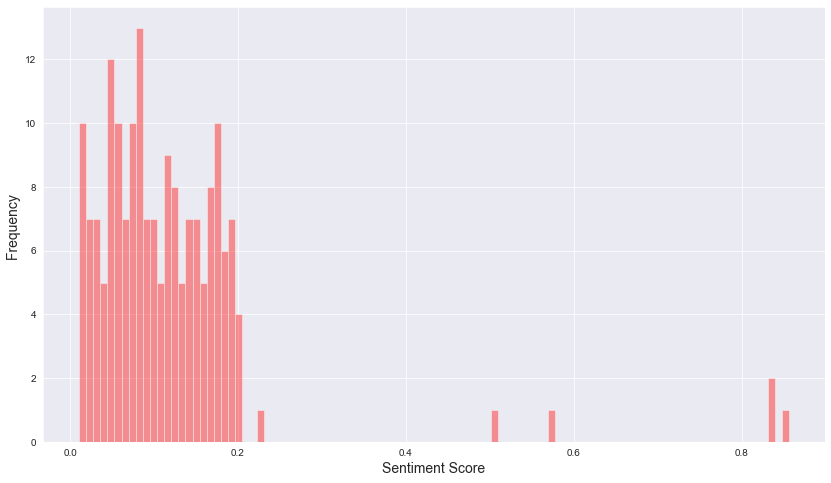

In [48]:
# Sactter plot the feature weight values
sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.distplot(list_senti, kde = False, color ='red', bins = 100)
plt.xlabel("Sentiment Score", size=14)
plt.ylabel("Frequency ", size=14)
plt.show()

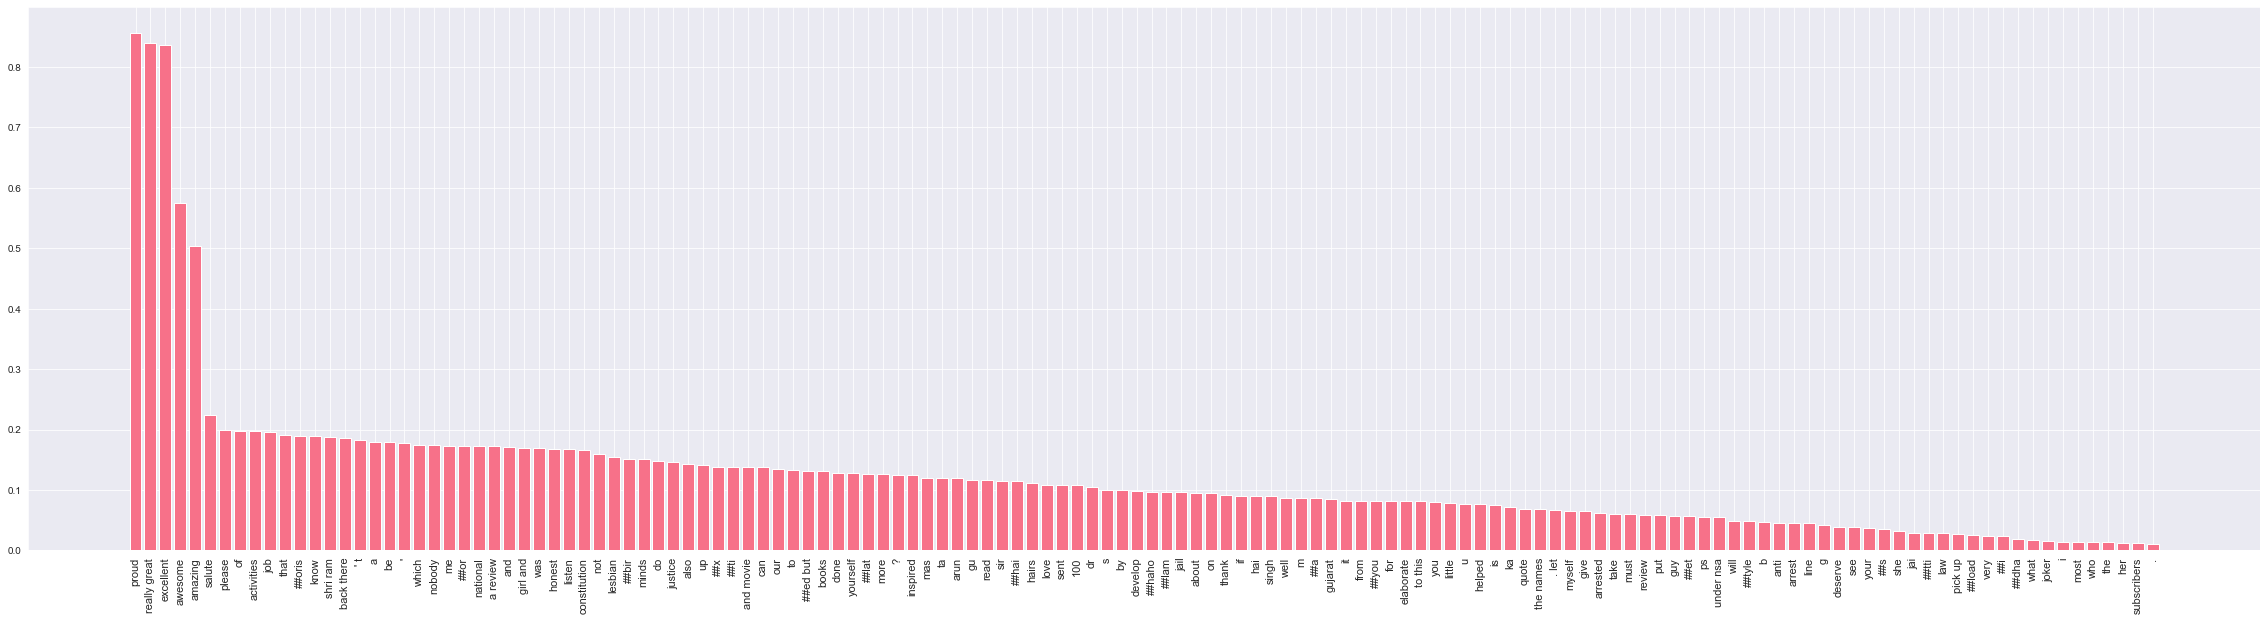

In [49]:
word_senti_dict = dict(zip(list_words, list_senti))
word_senti_dict  = {k: v for k, v in sorted(word_senti_dict.items(), key=lambda item: item[1], reverse=True)}
plt.figure(figsize=(40, 10))
plt.bar(range(len(word_senti_dict.keys())), word_senti_dict.values(), align='center')
plt.xticks(range(len(word_senti_dict.keys())), word_senti_dict.keys(), size=11, rotation=90)
plt.show()

 Similarity between the two distributions Feature weights and Sentiment : https://machinelearningmastery.com/divergence-between-probability-distributions/
 
 https://www.analyticsvidhya.com/blog/2020/12/using-predictive-power-score-to-pinpoint-non-linear-correlations/
 
 https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598

### Pearson Correlation Results

Text(0, 0.5, 'Correlation-Weights')

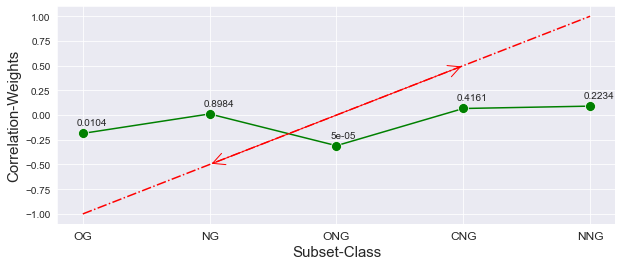

In [108]:
list_corr = [-0.1854, 0.0116, -0.3096, 0.0666, 0.0906]
list_pvalues=[0.0104, 0.8984, 0.000050, 0.4161, 0.2234]
list_class = ["OG", "NG", "ONG", "CNG", "NNG"]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.set_palette(sns.color_palette("husl", 8))
sns.lineplot(data=list_corr, marker="o", markersize= 10, color="green")
sns.lineplot(data=[-1, -0.5, 0, 0.5, 1], linestyle="-.", color="red")
plt.annotate("", xy=(3, 0.50), xytext=(1, -0.5), arrowprops=dict(arrowstyle="<->", color="red"), size=30)

for i, corr in enumerate(list_corr):
    plt.text(i-0.05, corr+0.08, list_pvalues[i])
plt.xlabel("Subset-Class", size=15)
plt.xticks(ticks=[x for x in range(len(list_class))], labels=list_class, size=12)
plt.ylabel("Correlation-Weights", size=15)

### Spearman Correlation Results

Text(0, 0.5, 'Correlation-Weights')

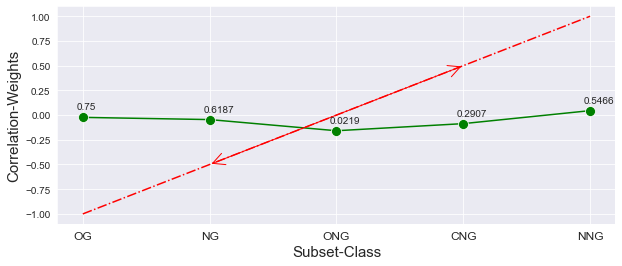

In [109]:
list_corr = [-0.0232, -0.0455, -0.1584, -0.0865, 0.0449]
list_pvalues=[0.7500, 0.6187, 0.0219, 0.2907, 0.5466]
list_class = ["OG", "NG", "ONG", "CNG", "NNG"]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.set_palette(sns.color_palette("husl", 8))
sns.lineplot(data=list_corr, marker="o", markersize= 10, color="green")
sns.lineplot(data=[-1, -0.5, 0, 0.5, 1], linestyle="-.", color="red")
plt.annotate("", xy=(3, 0.50), xytext=(1, -0.5), arrowprops=dict(arrowstyle="<->", color="red"), size=30)

for i, corr in enumerate(list_corr):
    plt.text(i-0.05, corr+0.08, list_pvalues[i])
plt.xlabel("Subset-Class", size=15)
plt.xticks(ticks=[x for x in range(len(list_class))], labels=list_class, size=12)
plt.ylabel("Correlation-Weights", size=15)

### Predictive Power Results

Text(0, 0.5, 'Predictive Power Scores')

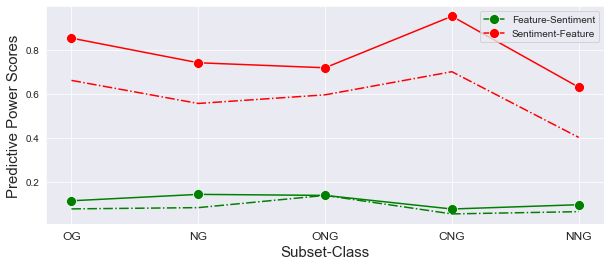

In [124]:
list_corr = [0.1131, 0.1423, 0.1376, 0.0757, 0.0952]
#list_pvalues=[0.7500, 0.6187, 0.0219, 0.2907, 0.5466]
list_class = ["OG", "NG", "ONG", "CNG", "NNG"]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
sns.set_palette(sns.color_palette("husl", 8))
sns.lineplot(data=list_corr, marker="o", markersize= 10, color="green", legend="brief", label="Feature-Sentiment")
sns.lineplot(data=[0.0762, 0.0819, 0.1376, 0.0533, 0.0636], linestyle="-.", color="green")
sns.lineplot(data=[0.8537, 0.7415, 0.7187, 0.9533, 0.6302], marker="o", markersize= 10, color="red", legend="brief", label="Sentiment-Feature")
sns.lineplot(data=[0.6612, 0.5562, 0.5955, 0.7008, 0.4016], linestyle="-.", color="red")
plt.xlabel("Subset-Class", size=15)
plt.legend(loc="upper right")
plt.xticks(ticks=[x for x in range(len(list_class))], labels=list_class, size=12)
plt.ylabel("Predictive Power Scores", size=15)